# Crypto Currency Prediction
Sijie Chen, Tianhao Li, Elena Wang, Zeyan Li, Chenyu Wu, Logan Li

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import figsize
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Read in Data

In [2]:
data = pd.read_csv('./data/data.csv')
data = data.set_index(['symbol_id','time_close'])
data

timeopen  \
symbol_id  time_close                                                   
THETA_2416 2018-01-18 00:59:59.999000+00:00  2018-01-18T00:00:00.000Z   
           2018-01-19 00:59:59.999000+00:00  2018-01-19T00:00:00.000Z   
           2018-01-20 00:59:59.999000+00:00  2018-01-20T00:00:00.000Z   
           2018-01-21 00:59:59.999000+00:00  2018-01-21T00:00:00.000Z   
           2018-01-22 00:59:59.999000+00:00  2018-01-22T00:00:00.000Z   
...                                                               ...   
TON_11419  2022-09-30 00:59:59.999000+00:00  2022-09-30T00:00:00.000Z   
           2022-10-01 00:59:59.999000+00:00  2022-10-01T00:00:00.000Z   
           2022-10-02 00:59:59.999000+00:00  2022-10-02T00:00:00.000Z   
           2022-10-03 00:59:59.999000+00:00  2022-10-03T00:00:00.000Z   
           2022-10-04 00:59:59.999000+00:00  2022-10-04T00:00:00.000Z   

                                                             timehigh  \
symbol_id  time_close                                                   
THETA_2416 2018-01-18 00:59:59.999000+00:00  2018-01-18T00:59:25.000Z   
           2018-01-19 00:59:59.999000+00:00  2018-01-19T00:59:26.000Z   
           2018-01-20 00:59:59.999000+00:00  2018-01-20T00:19:26.000Z   
           2018-01-21 00:59:59.999000+00:00  2018-01-21T00:19:26.000Z   
           2018-01-22 00:59:59.999000+00:00  2018-01-22T00:24:28.000Z   
...                                                               ...   
TON_11419  2022-09-30 00:59:59.999000+00:00  2022-09-30T00:11:00.000Z   
           2022-10-01 00:59:59.999000+00:00  2022-10-01T00:25:00.000Z   
           2022-10-02 00:59:59.999000+00:00  2022-10-02T00:27:00.000Z   
           2022-10-03 00:59:59.999000+00:00  2022-10-03T00:48:00.000Z   
           2022-10-04 00:59:59.999000+00:00  2022-10-04T00:21:00.000Z   

                                                              timelow  \
symbol_id  time_close                                                   
THETA_2416 2018-01-18 00:59:59.999000+00:00  2018-01-18T00:04:26.000Z   
           2018-01-19 00:59:59.999000+00:00  2018-01-19T00:09:26.000Z   
           2018-01-20 00:59:59.999000+00:00  2018-01-20T00:34:26.000Z   
           2018-01-21 00:59:59.999000+00:00  2018-01-21T00:59:26.000Z   
           2018-01-22 00:59:59.999000+00:00  2018-01-22T00:04:26.000Z   
...                                                               ...   
TON_11419  2022-09-30 00:59:59.999000+00:00  2022-09-30T00:46:00.000Z   
           2022-10-01 00:59:59.999000+00:00  2022-10-01T00:16:00.000Z   
           2022-10-02 00:59:59.999000+00:00  2022-10-02T00:49:00.000Z   
           2022-10-03 00:59:59.999000+00:00  2022-10-03T00:00:00.000Z   
           2022-10-04 00:59:59.999000+00:00  2022-10-04T00:59:00.000Z   

                                                 open      high       low  \
symbol_id  time_close                                                       
THETA_2416 2018-01-18 00:59:59.999000+00:00  0.183493  0.204696  0.183493   
           2018-01-19 00:59:59.999000+00:00  0.194234  0.198328  0.191835   
           2018-01-20 00:59:59.999000+00:00  0.181328  0.182519  0.174591   
           2018-01-21 00:59:59.999000+00:00  0.189285  0.190032  0.185274   
           2018-01-22 00:59:59.999000+00:00  0.164153  0.166939  0.164153   
...                                               ...       ...       ...   
TON_11419  2022-09-30 00:59:59.999000+00:00  1.302868  1.304251  1.299636   
           2022-10-01 00:59:59.999000+00:00  1.364738  1.365969  1.360302   
           2022-10-02 00:59:59.999000+00:00  1.388861  1.390668  1.386442   
           2022-10-03 00:59:59.999000+00:00  1.361924  1.369204  1.361924   
           2022-10-04 00:59:59.999000+00:00  1.347996  1.350359  1.345298   

                                                close       volume  \
symbol_id  time_close                                                
THETA_2416 2018-01-18 00:59:59.999000+00:00  0.204696          NaN   

# Data Preprocess

## Check NA

In [3]:
print(data.shape)
print(data.isna().sum())

(68336, 12)
timeopen         0
timehigh        30
timelow         30
open             0
high             0
low              0
close            0
volume       35563
marketcap        0
timestamp        0
symbol           0
id               0
dtype: int64


## Feature Engineering
For our analysis purpose, we are interested in predicting the daily close value for each crypto currency, which is the `close` value. In order to create a generalized model, we created new variables including `lagx`,`MAx`(moving average), `year`, `month`, `weekday` to decompose the information contained in the date. We believe from financial perspective, year, month and the day of the week will be able to explain variabilities in the closing price. We focused on year 2022.

During the EDA, we noticed large NAs in `volume` are `missing not at random`. Meaning `volume` data are missing for a specific time range. Because NAs are not sparse in the dataset but very concentrated in a specific time range, it would be better to drop `volume` column instead of imputing.  

In [4]:
#print(data[data['volume'].isnull()].groupby(['symbol_id']).size())
#print(data[data['volume'].isnull()].groupby(['time_close']).size())

# convert date to weekday
data['date'] = data['timestamp'].str[:10]
# convert to weekday
import calendar
data['date'] = pd.to_datetime(data['date'])
data['weekday']=data['date'].dt.day_name()
data['month'] = data['date'].dt.strftime("%b")
data['year'] = data['date'].dt.year

### check year range
#print(data['year'].unique())

In [5]:
# drop non-interested variables
data = data.drop(['volume','timeopen', 'timehigh', 'timelow', 'timestamp', 'symbol', 'id'], axis=1).reset_index().set_index(['symbol_id','date'])
data.dropna(inplace=True)
data

time_close      open      high  \
symbol_id  date                                                               
THETA_2416 2018-01-18  2018-01-18 00:59:59.999000+00:00  0.183493  0.204696   
           2018-01-19  2018-01-19 00:59:59.999000+00:00  0.194234  0.198328   
           2018-01-20  2018-01-20 00:59:59.999000+00:00  0.181328  0.182519   
           2018-01-21  2018-01-21 00:59:59.999000+00:00  0.189285  0.190032   
           2018-01-22  2018-01-22 00:59:59.999000+00:00  0.164153  0.166939   
...                                                 ...       ...       ...   
TON_11419  2022-09-30  2022-09-30 00:59:59.999000+00:00  1.302868  1.304251   
           2022-10-01  2022-10-01 00:59:59.999000+00:00  1.364738  1.365969   
           2022-10-02  2022-10-02 00:59:59.999000+00:00  1.388861  1.390668   
           2022-10-03  2022-10-03 00:59:59.999000+00:00  1.361924  1.369204   
           2022-10-04  2022-10-04 00:59:59.999000+00:00  1.347996  1.350359   

                            low     close     marketcap   weekday month  year  
symbol_id  date                                                                
THETA_2416 2018-01-18  0.183493  0.204696  0.000000e+00  Thursday   Jan  2018  
           2018-01-19  0.191835  0.198328  0.000000e+00    Friday   Jan  2018  
           2018-01-20  0.174591  0.176600  0.000000e+00  Saturday   Jan  2018  
           2018-01-21  0.185274  0.185274  0.000000e+00    Sunday   Jan  2018  
           2018-01-22  0.164153  0.164970  0.000000e+00    Monday   Jan  2018  
...                         ...       ...           ...       ...   ...   ...  
TON_11419  2022-09-30  1.299636  1.303193  1.591722e+09    Friday   Sep  2022  
           2022-10-01  1.360302  1.363556  1.665449e+09  Saturday   Oct  2022  
           2022-10-02  1.386442  1.388295  1.695665e+09    Sunday   Oct  2022  
           2022-10-03  1.361924  1.367565  1.670346e+09    Monday   Oct  2022  
           2022-10-04  1.345298  1.345298  1.643149e+09   Tuesday   Oct  2022  

[68336 rows x 9 columns]

In [6]:
start_date = datetime(2013,5,1)
end_date = datetime(2023,1,1)
symbols = data.index.unique(level=0).to_list()

for index in symbols:
    start_date = max(start_date,data.loc[index].index[0])
    end_date = min(end_date,data.loc[index].index[-1])
print('The largest overlap time range for our coins are from {} to {}'.format(start_date,end_date))

The largest overlap time range for our coins are from 2022-04-07 00:00:00 to 2022-10-04 00:00:00


In [7]:
### filter out dates out of range
result = []
for index in symbols:
    result.append(data.loc[index].index.isin(pd.date_range(start="2022-04-07",end="2022-10-04")))

In [8]:
result = np.concatenate(result).ravel()
data = data.reset_index()[result]
data = data.set_index(['symbol_id','date'])
data

time_close      open      high  \
symbol_id  date                                                               
THETA_2416 2022-04-07  2022-04-07 00:59:59.999000+00:00  3.292592  3.375140   
           2022-04-08  2022-04-08 00:59:59.999000+00:00  3.492001  3.519825   
           2022-04-09  2022-04-09 00:59:59.999000+00:00  3.325633  3.404710   
           2022-04-10  2022-04-10 00:59:59.999000+00:00  3.455300  3.471407   
           2022-04-11  2022-04-11 00:59:59.999000+00:00  3.343637  3.343637   
...                                                 ...       ...       ...   
TON_11419  2022-09-30  2022-09-30 00:59:59.999000+00:00  1.302868  1.304251   
           2022-10-01  2022-10-01 00:59:59.999000+00:00  1.364738  1.365969   
           2022-10-02  2022-10-02 00:59:59.999000+00:00  1.388861  1.390668   
           2022-10-03  2022-10-03 00:59:59.999000+00:00  1.361924  1.369204   
           2022-10-04  2022-10-04 00:59:59.999000+00:00  1.347996  1.350359   

                            low     close     marketcap   weekday month  year  
symbol_id  date                                                                
THETA_2416 2022-04-07  3.271286  3.276385  3.276385e+09  Thursday   Apr  2022  
           2022-04-08  3.478045  3.478045  3.478045e+09    Friday   Apr  2022  
           2022-04-09  3.325633  3.404710  3.404710e+09  Saturday   Apr  2022  
           2022-04-10  3.435954  3.435954  3.435954e+09    Sunday   Apr  2022  
           2022-04-11  3.290278  3.316159  3.316159e+09    Monday   Apr  2022  
...                         ...       ...           ...       ...   ...   ...  
TON_11419  2022-09-30  1.299636  1.303193  1.591722e+09    Friday   Sep  2022  
           2022-10-01  1.360302  1.363556  1.665449e+09  Saturday   Oct  2022  
           2022-10-02  1.386442  1.388295  1.695665e+09    Sunday   Oct  2022  
           2022-10-03  1.361924  1.367565  1.670346e+09    Monday   Oct  2022  
           2022-10-04  1.345298  1.345298  1.643149e+09   Tuesday   Oct  2022  

[9456 rows x 9 columns]

# Exploratory Data Analysis

## Plots to see the tendency in four coins

We plotted the close price for four crypto currencies. From the plots, we can catch non-stationary pattern and a quite different behavior tendencies for each coins.

In [9]:
# necessary for the code chunk below
# import subprocess
# import sys

# def install(package):
#     subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
# install('altair')

In [10]:
import altair as alt
alt.renderers.enable('mimetype')

def interactive_points(data, x_var, y_var, group_var, time_var, title, plotname):
    data_ = data.copy()
    click = alt.selection_multi(encodings=['color'])
    # legend
    legend = alt.Chart(data_).mark_rect().encode(y=alt.Y(group_var, axis=alt.Axis(title='Select Group')),
                                            color=alt.condition(click, group_var,alt.value('lightgray')),
                                            size=alt.value(250)).properties(selection=click)
    scatter=alt.Chart(data_).mark_circle(size=60).encode(x=x_var,y=y_var,color=group_var,tooltip=[x_var, y_var, group_var,
                                                         time_var]).properties(height=400,width=600,
                                                                                title=title).transform_filter(click).interactive()
    
    # add lines
    line = alt.Chart(data_).mark_line().encode(x=x_var,y=y_var).transform_filter(click).interactive()
    
    chart = scatter + line|legend
    
    # save plots
    path = "./PlayPlots/{a}.html".format(a = plotname)
    chart.save(path)
    
    return chart

In [11]:
data_4 = data.loc[data.index.unique(level=0).tolist()[0:4]].reset_index()
#interactive_points(data_4, 'date', 'close', 'symbol_id', 'time_close', 'Different Coins Performance', 'Different Coins Performance')

In [12]:
# by simple linear regression to give the tendency 
def interactive_tendency(data, x_var, y_var, group_var, time_var, title, plotname):
    data_ = data.copy()
    click = alt.selection_multi(encodings=['color'])
    # legend
    legend = alt.Chart(data_).mark_rect().encode(y=alt.Y(group_var, axis=alt.Axis(title='Select Group')),
                                                color=alt.condition(click, group_var,alt.value('lightgray')),
                                                    size=alt.value(250)).properties(selection=click)
    scatter=alt.Chart(data_).mark_circle(size=60).encode(x=x_var,y=y_var,color=group_var,
                                                         tooltip=[x_var, y_var, group_var, 
                                                                  time_var]).properties(height=400,width=600,
                                                                                        title=title).transform_filter(click).interactive()
    
    # lm regression line
    df_lm = alt.Chart(data_).mark_point().encode(x=x_var,y=y_var).transform_filter(click).interactive()
    lm = df_lm.transform_regression(x_var, y_var).mark_line(color= 'black')
    
    chart = scatter + lm|legend
    
    # save plots
    path = "./PlayPlots/{a}.html".format(a = plotname)
    chart.save(path)
    
    return chart

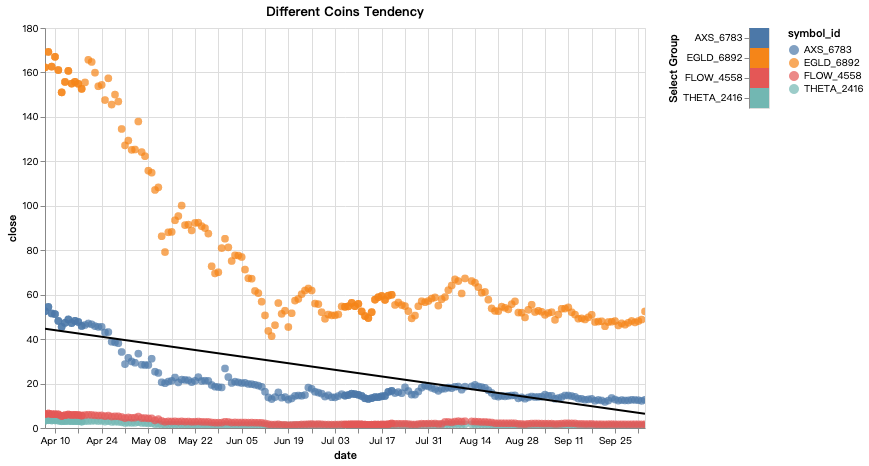

In [13]:
interactive_tendency(data_4, 'date', 'close', 'symbol_id', 'time_close', 'Different Coins Tendency', 'Different Coins Tendency')

## Plot rolling statistic
This method graphs the rolling statistics (mean and variance) to show at a glance whether the standard deviation changes substantially over time. At this point, we want to forcast the future 12 days so set the rolling window is 12. \
Standard deviation seems like more stable, but mean for stationary data change much over time. In addition, in this case, since the y-axis has such a small scale, we can not confidently conclude that our data is non-stationary by simply viewing the below graph. Therefore, we should do another test of stationarity.

In [14]:
# function of plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title, window):
    
    # Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window = window).mean() 
    rolstd = pd.Series(timeseries).rolling(window = window).std()
    
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std');
    ax.legend(loc='upper left')
    ax.set_ylabel('numbers')
    ax.set_xlabel('year-week')
    ax.set_title('Rolling Statistics of ' + f'{indexname}' + ' by window ' + str(window))

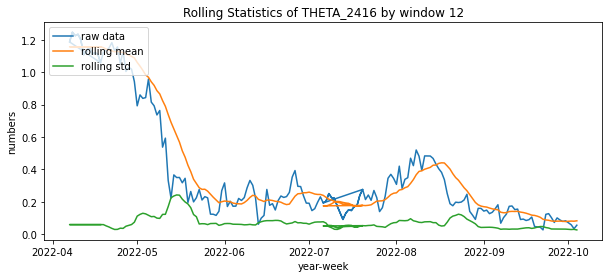

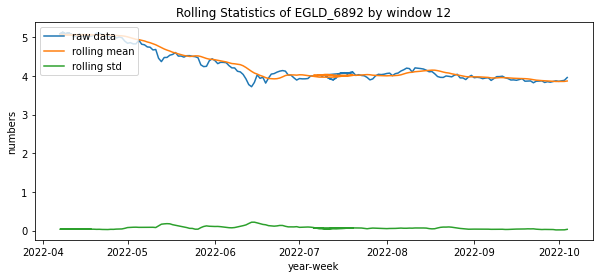

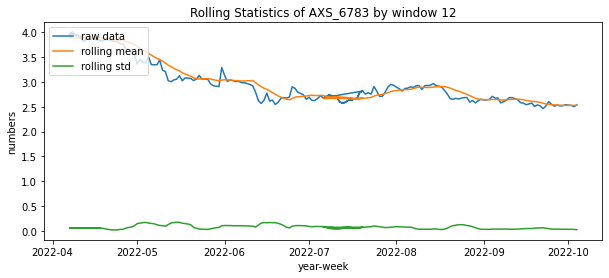

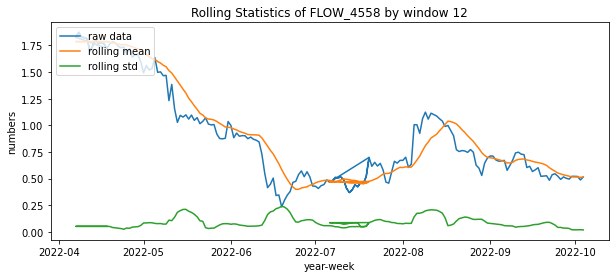

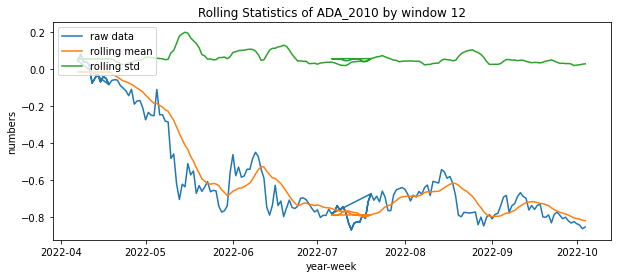

In [15]:
# list of all symbol id
symbols = data.index.unique(level=0).to_list()

for indexname in list(symbols)[0:5]:
    pd.options.display.float_format = '{:.8f}'.format
    test_stationarity(np.log(data.loc[indexname].close),'raw data', 12)

## Check the stationary for `close`

We plotted the first four currencies against time, we noticed they all failed the ad-fuller test. We should consider perform differencing in order to reject the hypothesis test and transform time series to stationary. 

Testing THETA_2416 from 2022-04-07 to 2022-10-04 for Stationarity
ADF Statistic: -2.150
p-value: 2.247E-01
Critical values :
	1%: -3.463987334463603 - The data is not stationary with 99% confidence
	5%: -2.8763259091636213 - The data is not stationary with 95% confidence
	10%: -2.5746515171738515 - The data is not stationary with 90% confidence
Failed to Reject H_0 at 5% -> THETA_2416 Time Series is Non-Stationary


Testing EGLD_6892 from 2022-04-07 to 2022-10-04 for Stationarity
ADF Statistic: -2.992
p-value: 3.568E-02
Critical values :
	1%: -3.465058702600837 - The data is not stationary with 99% confidence
	5%: -2.8767942675230356 - The data is  stationary with 95% confidence
	10%: -2.5749014492475535 - The data is  stationary with 90% confidence
Reject H_0 at at 5% -> EGLD_6892 Time Series is Stationary


Testing AXS_6783 from 2022-04-07 to 2022-10-04 for Stationarity
ADF Statistic: -2.530
p-value: 1.083E-01
Critical values :
	1%: -3.463987334463603 - The data is not stationary wit

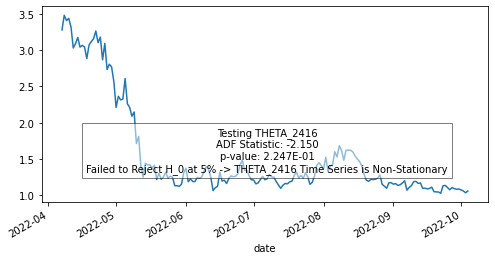

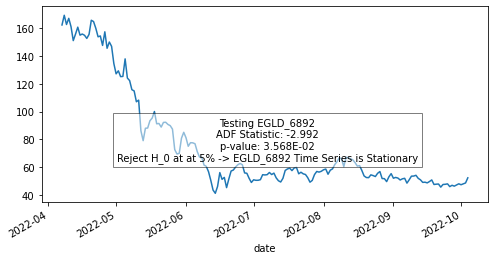

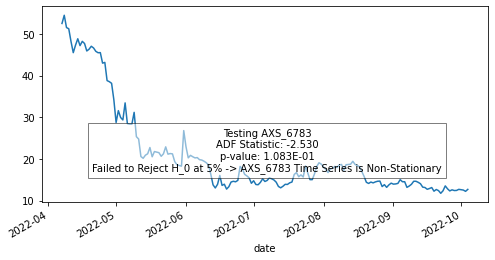

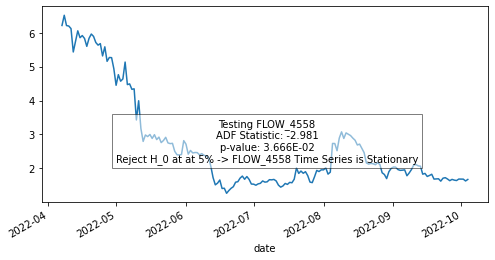

In [16]:
# ADF statistic to check stationarity for first 4
for indexname in symbols[0:4]:
    timeseries = data.loc[indexname].close
    result = adfuller(timeseries)
    plt.figure(figsize=(8, 4))
    ax = timeseries.plot(secondary_y=False, logy=False)
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    
    print(f'Testing {indexname} from {timeseries.index[0]:%Y-%m-%d} to {timeseries.index[-1]:%Y-%m-%d} for Stationarity')
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3E}')
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

    if result[0] > result[4]["5%"]:
        conclusion=f"Failed to Reject H_0 at 5% -> {indexname} Time Series is Non-Stationary"
    else:
        conclusion=f"Reject H_0 at at 5% -> {indexname} Time Series is Stationary"
    print(conclusion)
    ax.text(x=timeseries.index[len(timeseries)//2], y=timeseries.mean(),
        s=f'Testing {indexname}\nADF Statistic: {result[0]:.3f}\np-value: {result[1]:.3E}\n'+conclusion,
        horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
        
    print('\n')

## Remove non-staionary

We noticed not all the time series are non-stationary. \
Algorithm: https://otexts.com/fpp2/stationarity.html \
Application: https://towardsdatascience.com/how-to-remove-non-stationarity-in-time-series-forecasting-563c05c4bfc7

Remove non-stationary for 'close'

In [17]:
# For "close"
remove_list = []
for indexname in symbols:
    #print(indexname)
    result = adfuller(data.loc[indexname].close)
    if result[0] > result[4]["5%"]:
        non_stationary = True
        d = 1
        while non_stationary:
            if d == 1:
                remove_list.append(indexname)
            fd = data.loc[indexname].close.diff(periods=d).fillna(0)
            result = adfuller(fd)
            #print(f"differentiated  at d={d}, ADF p-value={result[1]:.3E}")
            non_stationary = result[1]>0.05
            d +=1
    else:
        print(f"Reject H_0 at at 5% -> {indexname} Time Series is Stationary")

Reject H_0 at at 5% -> EGLD_6892 Time Series is Stationary
Reject H_0 at at 5% -> FLOW_4558 Time Series is Stationary
Reject H_0 at at 5% -> LUNC_4172 Time Series is Stationary
Reject H_0 at at 5% -> MANA_1966 Time Series is Stationary
Reject H_0 at at 5% -> FIL_2280 Time Series is Stationary
Reject H_0 at at 5% -> NEAR_6535 Time Series is Stationary
Reject H_0 at at 5% -> ATOM_3794 Time Series is Stationary
Reject H_0 at at 5% -> CRO_3635 Time Series is Stationary


In [18]:
with pd.option_context('mode.chained_assignment',None):
    for indexname in remove_list:
        data.loc[indexname].close = data.loc[indexname].close.diff(periods=1).fillna(0)

Remove non-stationary for 'open'

In [19]:
# For 'open'
remove_list_open = []
for indexname in symbols:
    #print(indexname)
    result = adfuller(data.loc[indexname].open)
    if result[0] > result[4]["5%"]:
        non_stationary = True
        d = 1
        while non_stationary:
            if d == 1:
                remove_list_open.append(indexname)
            fd = data.loc[indexname].open.diff(periods=d).fillna(0)
            result = adfuller(fd)
            #print(f"differentiated  at d={d}, ADF p-value={result[1]:.3E}")
            non_stationary = result[1]>0.05
            d +=1
    else:
        print(f"Reject H_0 at at 5% -> {indexname} Time Series is Stationary")

Reject H_0 at at 5% -> EGLD_6892 Time Series is Stationary
Reject H_0 at at 5% -> SAND_6210 Time Series is Stationary
Reject H_0 at at 5% -> LUNC_4172 Time Series is Stationary
Reject H_0 at at 5% -> MANA_1966 Time Series is Stationary
Reject H_0 at at 5% -> FIL_2280 Time Series is Stationary
Reject H_0 at at 5% -> NEAR_6535 Time Series is Stationary
Reject H_0 at at 5% -> CRO_3635 Time Series is Stationary


In [20]:
with pd.option_context('mode.chained_assignment',None):
    for indexname in remove_list_open:
        data.loc[indexname].open = data.loc[indexname].open.diff(periods=1).fillna(0)

Since `XRP_52` has much different differentiated performance both for close and open than others, we would remove it. 

In [21]:
data = data.drop('XRP_52',level='symbol_id')
data

time_close       open       high  \
symbol_id  date                                                                 
THETA_2416 2022-04-07  2022-04-07 00:59:59.999000+00:00 3.29259186 3.37514031   
           2022-04-08  2022-04-08 00:59:59.999000+00:00 3.49200099 3.51982478   
           2022-04-09  2022-04-09 00:59:59.999000+00:00 3.32563250 3.40470991   
           2022-04-10  2022-04-10 00:59:59.999000+00:00 3.45529978 3.47140701   
           2022-04-11  2022-04-11 00:59:59.999000+00:00 3.34363659 3.34363659   
...                                                 ...        ...        ...   
TON_11419  2022-09-30  2022-09-30 00:59:59.999000+00:00 1.30286767 1.30425070   
           2022-10-01  2022-10-01 00:59:59.999000+00:00 1.36473776 1.36596888   
           2022-10-02  2022-10-02 00:59:59.999000+00:00 1.38886060 1.39066777   
           2022-10-03  2022-10-03 00:59:59.999000+00:00 1.36192401 1.36920406   
           2022-10-04  2022-10-04 00:59:59.999000+00:00 1.34799625 1.35035898   

                             low      close           marketcap   weekday  \
symbol_id  date                                                             
THETA_2416 2022-04-07 3.27128626 3.27638495 3276384947.96000004  Thursday   
           2022-04-08 3.47804523 3.47804523 3478045234.51999998    Friday   
           2022-04-09 3.32563250 3.40470991 3404709908.23000002  Saturday   
           2022-04-10 3.43595358 3.43595358 3435953582.19999981    Sunday   
           2022-04-11 3.29027836 3.31615897 3316158971.46000004    Monday   
...                          ...        ...                 ...       ...   
TON_11419  2022-09-30 1.29963555 1.30319318 1591721689.03999996    Friday   
           2022-10-01 1.36030226 1.36355643 1665449431.06999993  Saturday   
           2022-10-02 1.38644199 1.38829518 1695665368.90000010    Sunday   
           2022-10-03 1.36192401 1.36756501 1670345512.35999990    Monday   
           2022-10-04 1.34529836 1.34529836 1643149009.17000008   Tuesday   

                      month  year  
symbol_id  date                    
THETA_2416 2022-04-07   Apr  2022  
           2022-04-08   Apr  2022  
           2022-04-09   Apr  2022  
           2022-04-10   Apr  2022  
           2022-04-11   Apr  2022  
...                     ...   ...  
TON_11419  2022-09-30   Sep  2022  
           2022-10-01   Oct  2022  
           2022-10-02   Oct  2022  
           2022-10-03   Oct  2022  
           2022-10-04   Oct  2022  

[9249 rows x 9 columns]

## ACF & PACF

Here we also want to see if `log` could reduce non-stationary, so we also take log for acf&pacf. \
According to the original acf&pacf and log acf&pacf plots, we should add lag and moving average variables into our model to provide more information when predicting the close price. It is not surprising that the auto-correlation between close price in consecutive days are high. 

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# acf & pacf function
def acf_pacf_log(variable, lags):
    # Calculate ACF and PACF and Draw Plots
    fig, axes = plt.subplots(1,2,figsize=(10,5), dpi= 100)
    acf = plot_acf(variable.tolist(), lags=lags, ax=axes[0])
    pacf = plot_pacf(variable.tolist(),  method='ols', lags=lags, ax=axes[1])
    # fig.suptitle(f"acf&pacf of %d by %d lags" %(variable, lags))
    fig.suptitle('acf&pacf of close in ' + f'log({indexname}) by ' + str(lags) + ' lags')

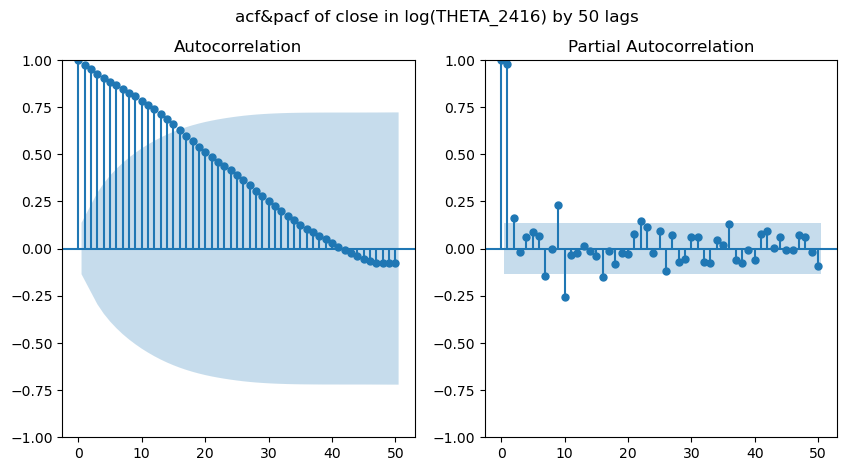

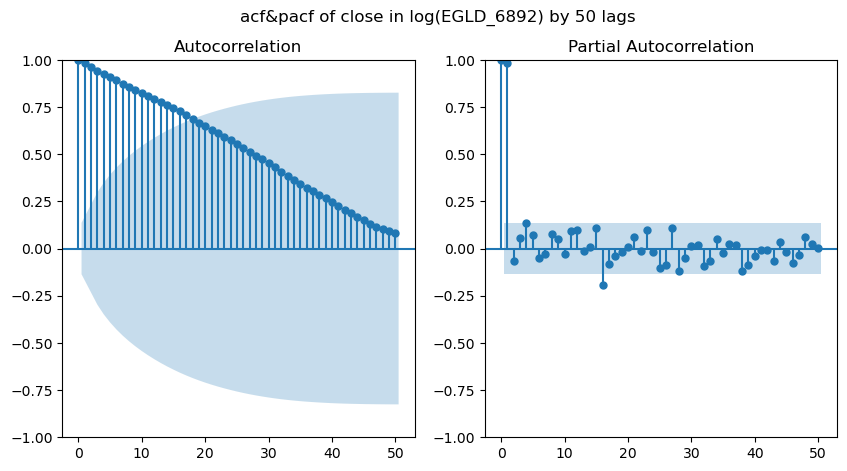

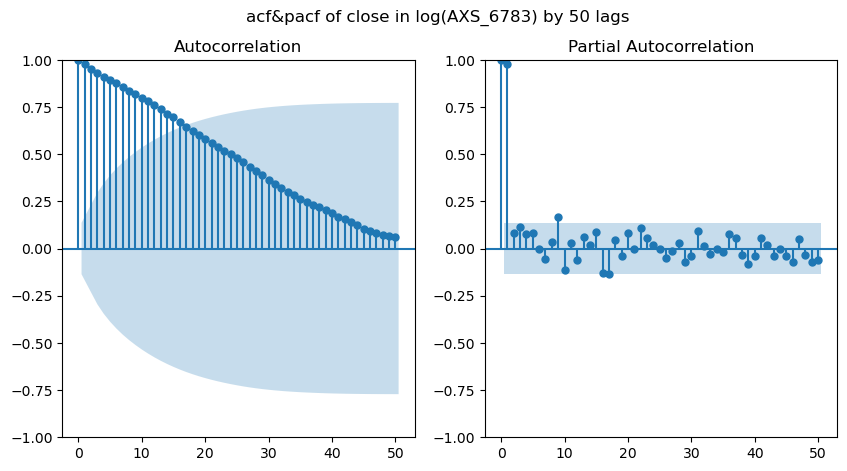

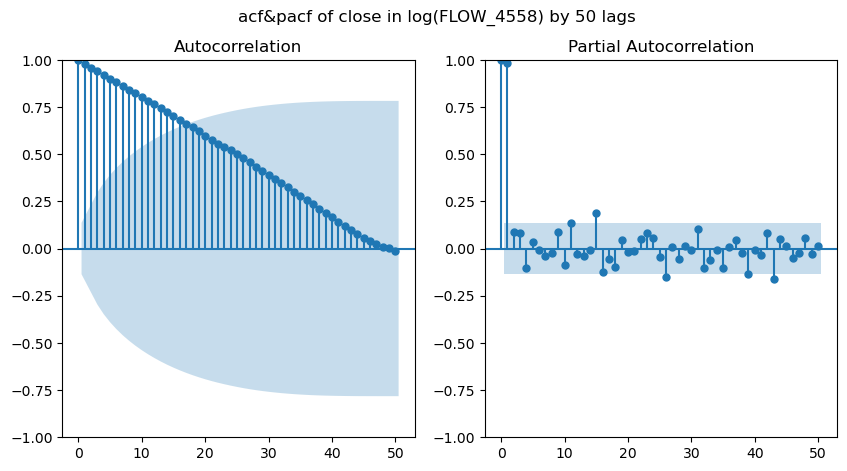

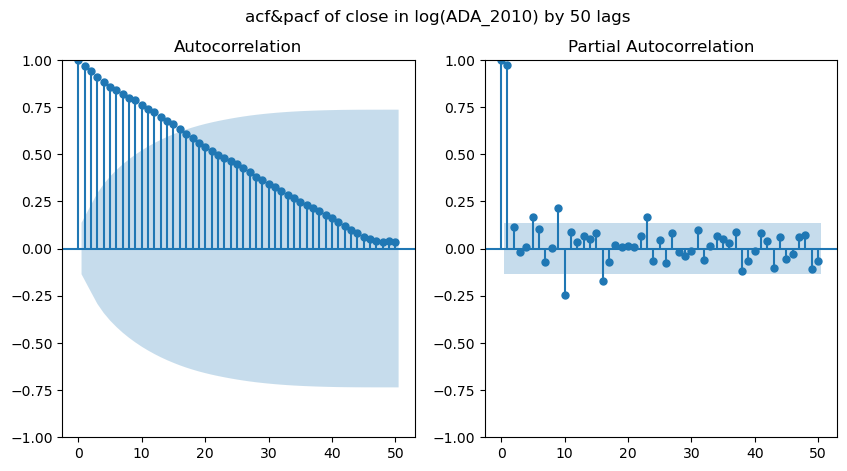

In [23]:
for indexname in list(symbols)[0:5]:
    acf_pacf_log(np.log(data.loc[indexname].close), 50)

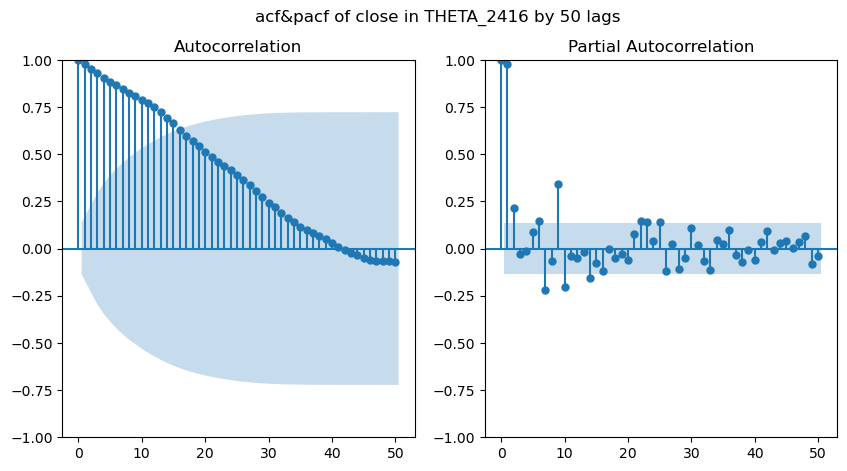

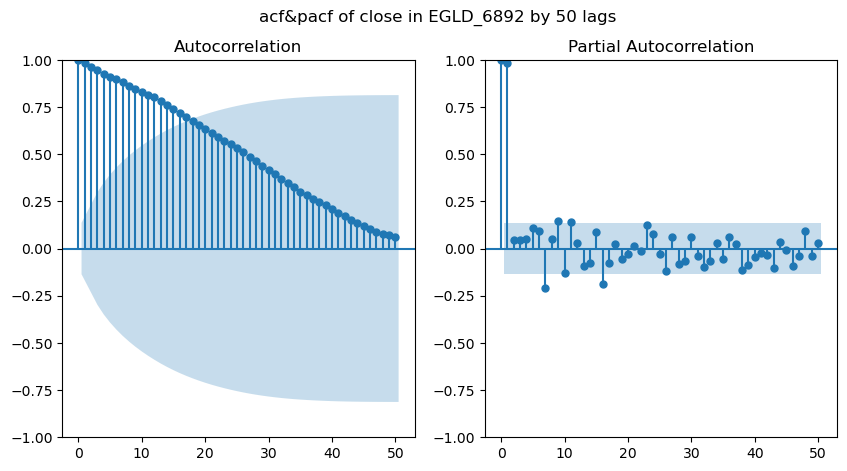

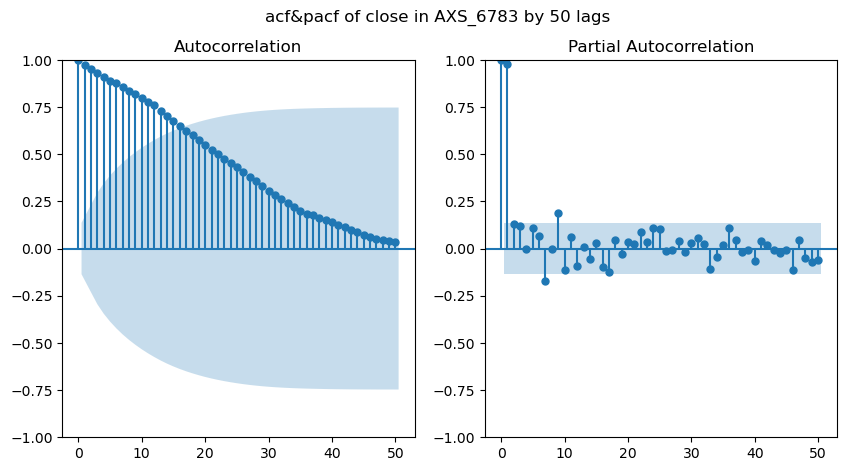

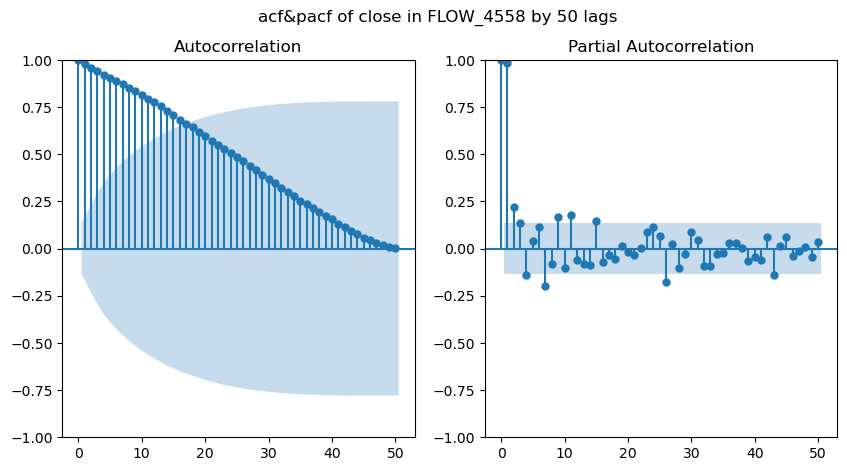

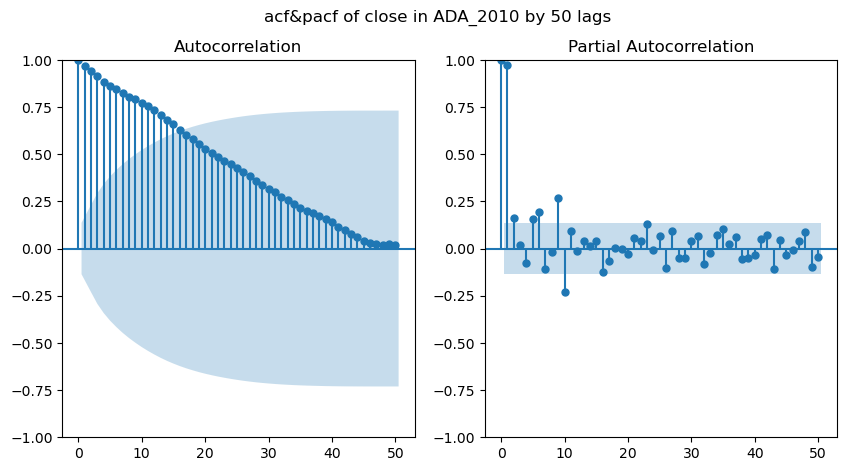

In [24]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# acf & pacf function
def acf_pacf(variable, lags):
    # Calculate ACF and PACF and Draw Plots
    fig, axes = plt.subplots(1,2,figsize=(10,5), dpi= 100)
    acf = plot_acf(variable.tolist(), lags=lags, ax=axes[0])
    pacf = plot_pacf(variable.tolist(),  method='ols', lags=lags, ax=axes[1])
    # fig.suptitle(f"acf&pacf of %d by %d lags" %(variable, lags))
    fig.suptitle('acf&pacf of close in ' + f'{indexname} by ' + str(lags) + ' lags')
    
for indexname in list(symbols)[0:5]:
    acf_pacf(data.loc[indexname].close, 50)

### Create new variables lags and moving average based on ACF & PACF
By comparing acf & pacf below, we decide to introduce `lag5`, `lag10` and `lag25` for lags and `ma5`, `ma10`, `ma25` for moving average into the model. If those independent variables are high correlated with each other, the following LASSO model will draw highly correlated columns' coefficient to 0 to exclude them from the model. \
Note here we won't have current close value while doing forecast, the moving average of y should have one more shift. \
Lags and moving averages would execute new `NA` values and need to be dropped for future modellling. 

In [25]:
# get rid of multi index for now
data = data.reset_index(1)
data

,date,time_close,open,high,low,close,marketcap,weekday,month,year
symbol_id,,,,,,,,,,
THETA_2416,2022-04-07,2022-04-07 00:59:59.999000+00:00,3.29259186,3.37514031,3.27128626,3.27638495,3276384947.96000004,Thursday,Apr,2022
THETA_2416,2022-04-08,2022-04-08 00:59:59.999000+00:00,3.49200099,3.51982478,3.47804523,3.47804523,3478045234.51999998,Friday,Apr,2022
THETA_2416,2022-04-09,2022-04-09 00:59:59.999000+00:00,3.32563250,3.40470991,3.32563250,3.40470991,3404709908.23000002,Saturday,Apr,2022
THETA_2416,2022-04-10,2022-04-10 00:59:59.999000+00:00,3.45529978,3.47140701,3.43595358,3.43595358,3435953582.19999981,Sunday,Apr,2022
THETA_2416,2022-04-11,2022-04-11 00:59:59.999000+00:00,3.34363659,3.34363659,3.29027836,3.31615897,3316158971.46000004,Monday,Apr,2022
...,...,...,...,...,...,...,...,...,...,...
TON_11419,2022-09-30,2022-09-30 00:59:59.999000+00:00,1.30286767,1.30425070,1.29963555,1.30319318,1591721689.03999996,Friday,Sep,2022
TON_11419,2022-10-01,2022-10-01 00:59:59.999000+00:00,1.36473776,1.36596888,1.36030226,1.36355643,1665449431.06999993,Saturday,Oct,2022
TON_11419,2022-10-02,2022-10-02 00:59:59.999000+00:00,1.38886060,1.39066777,1.38644199,1.38829518,1695665368.90000010,Sunday,Oct,2022


In [26]:
# create lag variables
data['lag5'] = data['close'].shift(5)
data['lag10'] = data['close'].shift(10)
data['lag25'] = data['close'].shift(25)
# create moving average variables
data['ma5'] = data['close'].rolling(window = 5).mean().shift(1)
data['ma10'] = data['close'].rolling(window = 10).mean().shift(1)
data['ma25'] = data['close'].rolling(window = 25).mean().shift(1)
# I dropped rows containing na here
data = data.dropna()
data.head(11)

,date,time_close,open,high,low,close,marketcap,weekday,month,year,lag5,lag10,lag25,ma5,ma10,ma25
symbol_id,,,,,,,,,,,,,,,,
THETA_2416,2022-04-20,2022-04-20 00:59:59.999000+00:00,3.15148653,3.15318740,3.10384332,3.11602902,3116029016.30000019,Wednesday,Apr,2022,3.03929108,3.43595358,3.27638495,3.01893281,3.11354149,3.18081628
THETA_2416,2022-04-21,2022-04-21 00:59:59.999000+00:00,3.09511521,3.15465656,3.09396452,3.15465656,3154656562.26000023,Thursday,Apr,2022,3.06342827,3.31615897,3.47804523,3.03428040,3.08154903,3.17440204
THETA_2416,2022-04-22,2022-04-22 00:59:59.999000+00:00,3.26130474,3.28223095,3.22818160,3.26173870,3261738704.13000011,Friday,Apr,2022,3.04123483,3.02836526,3.40470991,3.05252606,3.06539879,3.16146650
THETA_2416,2022-04-23,2022-04-23 00:59:59.999000+00:00,3.13269129,3.15057851,3.09488492,3.10125327,3101253265.30999994,Saturday,Apr,2022,2.88200690,3.08717131,3.43595358,3.09662683,3.08873614,3.15574765
THETA_2416,2022-04-24,2022-04-24 00:59:59.999000+00:00,3.10680048,3.19453398,3.10536877,3.17746122,3177461224.48999977,Sunday,Apr,2022,3.06870298,3.17310171,3.31615897,3.14047610,3.09014433,3.14235964
THETA_2416,2022-04-25,2022-04-25 00:59:59.999000+00:00,2.99629909,3.00300847,2.86452612,2.86577231,2865772305.38000011,Monday,Apr,2022,3.11602902,3.03929108,3.02836526,3.16222775,3.09058028,3.13681173
THETA_2416,2022-04-26,2022-04-26 00:59:59.999000+00:00,3.02844158,3.09245677,3.01657623,3.09141971,3091419706.94999981,Tuesday,Apr,2022,3.15465656,3.06342827,3.08717131,3.11217641,3.07322841,3.13030801
THETA_2416,2022-04-27,2022-04-27 00:59:59.999000+00:00,2.72851817,2.74749550,2.71256237,2.73063211,2730632108.84000015,Wednesday,Apr,2022,3.26173870,3.04123483,3.17310171,3.09952904,3.07602755,3.13047794
THETA_2416,2022-04-28,2022-04-28 00:59:59.999000+00:00,2.81917260,2.82026230,2.79577969,2.80341567,2803415670.07999992,Thursday,Apr,2022,3.10125327,2.88200690,3.03929108,2.99330772,3.04496728,3.11277916


## Create diff = close - open

Since we noticed that the `close` we wanted to predict is highly correlated with open, so we decided to use the rest predictors to predict the difference between `close` and `open`. To do so, we need to construct the `diff`.

In [27]:
diff = pd.DataFrame(data.apply(lambda row: row.close - row.open, axis=1))
data['diff'] = data['close'] - data['open']
data

/tmp/ipykernel_24609/2559846800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diff'] = data['close'] - data['open']


,date,time_close,open,high,low,close,marketcap,weekday,month,year,lag5,lag10,lag25,ma5,ma10,ma25,diff
symbol_id,,,,,,,,,,,,,,,,,
THETA_2416,2022-04-20,2022-04-20 00:59:59.999000+00:00,3.15148653,3.15318740,3.10384332,3.11602902,3116029016.30000019,Wednesday,Apr,2022,3.03929108,3.43595358,3.27638495,3.01893281,3.11354149,3.18081628,-0.03545752
THETA_2416,2022-04-21,2022-04-21 00:59:59.999000+00:00,3.09511521,3.15465656,3.09396452,3.15465656,3154656562.26000023,Thursday,Apr,2022,3.06342827,3.31615897,3.47804523,3.03428040,3.08154903,3.17440204,0.05954135
THETA_2416,2022-04-22,2022-04-22 00:59:59.999000+00:00,3.26130474,3.28223095,3.22818160,3.26173870,3261738704.13000011,Friday,Apr,2022,3.04123483,3.02836526,3.40470991,3.05252606,3.06539879,3.16146650,0.00043396
THETA_2416,2022-04-23,2022-04-23 00:59:59.999000+00:00,3.13269129,3.15057851,3.09488492,3.10125327,3101253265.30999994,Saturday,Apr,2022,2.88200690,3.08717131,3.43595358,3.09662683,3.08873614,3.15574765,-0.03143803
THETA_2416,2022-04-24,2022-04-24 00:59:59.999000+00:00,3.10680048,3.19453398,3.10536877,3.17746122,3177461224.48999977,Sunday,Apr,2022,3.06870298,3.17310171,3.31615897,3.14047610,3.09014433,3.14235964,0.07066075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TON_11419,2022-09-30,2022-09-30 00:59:59.999000+00:00,1.30286767,1.30425070,1.29963555,1.30319318,1591721689.03999996,Friday,Sep,2022,1.29703310,1.48478182,1.47276567,1.29621076,1.35325220,1.58584172,0.00032551
TON_11419,2022-10-01,2022-10-01 00:59:59.999000+00:00,1.36473776,1.36596888,1.36030226,1.36355643,1665449431.06999993,Saturday,Oct,2022,1.27723333,1.40478122,1.69784089,1.29744278,1.33509334,1.57905883,-0.00118133
TON_11419,2022-10-02,2022-10-02 00:59:59.999000+00:00,1.38886060,1.39066777,1.38644199,1.38829518,1695665368.90000010,Sunday,Oct,2022,1.28485592,1.33435514,1.66541967,1.31470740,1.33097086,1.56568745,-0.00056542


## Standardize data
Standardized predictors ensure the all predictors ranges from 0 to 1. Standardization may introduce some diffculties for variable explanation, but it will improve the performance for clustering. 

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# # Make copy of data
data_copy = data.copy()
# Specify features to transform
scale_cols = ['open', 'high', 'low', 'close', 'marketcap', 'lag5','lag10','lag25', 'ma5', 'ma10', 'ma25']
data_scale = data_copy[scale_cols]
# Transorm specified columns
ct = ColumnTransformer([('minmax', MinMaxScaler(), scale_cols)], remainder='passthrough')
data_scale = pd.DataFrame(ct.fit_transform(data_scale), columns = scale_cols)
data_scale = data_scale.add_suffix('_scale')
# add original diff
data_scale['diff'] = data['diff'].values

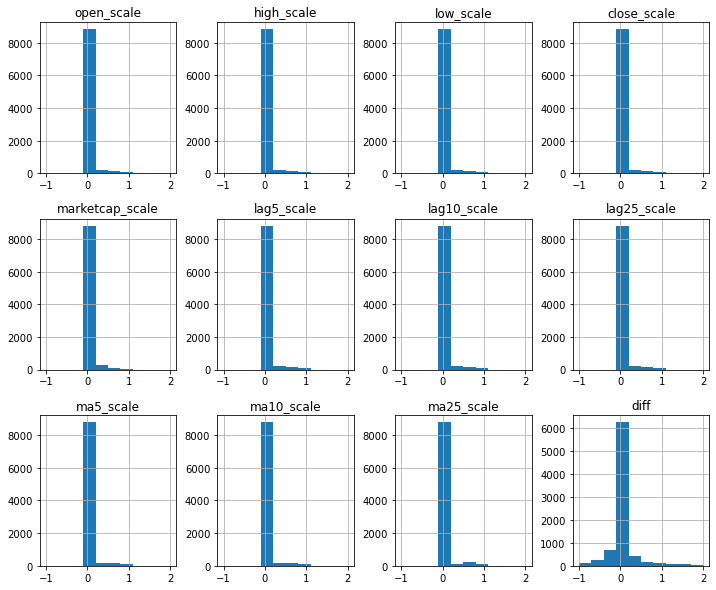

In [29]:
# function of all histogram plots for all features
def hisplots_all(data, col, row, figsize):
    fig, axes = plt.subplots(col, row, figsize = figsize)
    i = 0
    for triaxis in axes:
        for axis in triaxis:
            data.hist(column = data.columns[i], range = [-1, 2], bins =10, ax=axis)
            i = i+1
# plots histograms for all variables
hisplots_all(data_scale, 3, 4, figsize = (12,10))

In [30]:
data_copy = data.reset_index()
data_scale.columns = data_scale.columns.str.replace("_scale", "")  # strip suffix 'scale'

# Add string columns back to the data frame
col_str = ['symbol_id','time_close', 'weekday', 'month', 'year', 'date']
for col in col_str:
    data_scale[col] = data_copy[col]

data_scale = data_scale.set_index(['symbol_id','date'])
data_scale

open       high        low      close  marketcap  \
symbol_id  date                                                                
THETA_2416 2022-04-20 0.00007235 0.00007236 0.00007146 0.00007173 0.00341576   
           2022-04-21 0.00007106 0.00007239 0.00007123 0.00007262 0.00346265   
           2022-04-22 0.00007487 0.00007532 0.00007432 0.00007509 0.00359262   
           2022-04-23 0.00007192 0.00007230 0.00007125 0.00007139 0.00339783   
           2022-04-24 0.00007132 0.00007331 0.00007149 0.00007315 0.00349033   
...                          ...        ...        ...        ...        ...   
TON_11419  2022-09-30 0.00002991 0.00002993 0.00002992 0.00003000 0.00156566   
           2022-10-01 0.00003133 0.00003135 0.00003132 0.00003139 0.00165515   
           2022-10-02 0.00003188 0.00003191 0.00003192 0.00003196 0.00169182   
           2022-10-03 0.00003127 0.00003142 0.00003135 0.00003148 0.00166109   
           2022-10-04 0.00003095 0.00003099 0.00003097 0.00003097 0.00162808   

                            lag5      lag10      lag25        ma5       ma10  \
symbol_id  date                                                                
THETA_2416 2022-04-20 0.00006997 0.00007910 0.00007543 0.00007061 0.00007491   
           2022-04-21 0.00007052 0.00007634 0.00008007 0.00007097 0.00007414   
           2022-04-22 0.00007001 0.00006972 0.00007838 0.00007140 0.00007375   
           2022-04-23 0.00006635 0.00007107 0.00007910 0.00007243 0.00007431   
           2022-04-24 0.00007065 0.00007305 0.00007634 0.00007345 0.00007435   
...                          ...        ...        ...        ...        ...   
TON_11419  2022-09-30 0.00002986 0.00003418 0.00003390 0.00003032 0.00003256   
           2022-10-01 0.00002940 0.00003234 0.00003909 0.00003035 0.00003212   
           2022-10-02 0.00002958 0.00003072 0.00003834 0.00003075 0.00003202   
           2022-10-03 0.00002996 0.00003399 0.00004324 0.00003123 0.00003215   
           2022-10-04 0.00003040 0.00003110 0.00004257 0.00003154 0.00003189   

                            ma25        diff  \
symbol_id  date                                
THETA_2416 2022-04-20 0.00007709 -0.03545752   
           2022-04-21 0.00007693  0.05954135   
           2022-04-22 0.00007662  0.00043396   
           2022-04-23 0.00007648 -0.03143803   
           2022-04-24 0.00007615  0.07066075   
...                          ...         ...   
TON_11419  2022-09-30 0.00003843  0.00032551   
           2022-10-01 0.00003827 -0.00118133   
           2022-10-02 0.00003794 -0.00056542   
           2022-10-03 0.00003767  0.00564099   
           2022-10-04 0.00003718 -0.00269789   

                                             time_close    weekday month  year  
symbol_id  date                                                                 
THETA_2416 2022-04-20  2022-04-20 00:59:59.999000+00:00  Wednesday   Apr  2022  
           2022-04-21  2022-04-21 00:59:59.999000+00:00   Thursday   Apr  2022  
           2022-04-22  2022-04-22 00:59:59.999000+00:00     Friday   Apr  2022  
           2022-04-23  2022-04-23 00:59:59.999000+00:00   Saturday   Apr  2022  
           2022-04-24  2022-04-24 00:59:59.999000+00:00     Sunday   Apr  2022  
...                                                 ...        ...   ...   ...  
TON_11419  2022-09-30  2022-09-30 00:59:59.999000+00:00     Friday   Sep  2022  
           2022-10-01  2022-10-01 00:59:59.999000+00:00   Saturday   Oct  2022  
           2022-10-02  2022-10-02 00:59:59.999000+00:00     Sunday   Oct  2022  
           2022-10-03  2022-10-03 00:59:59.999000+00:00     Monday   Oct  2022  
           2022-10-04  2022-10-04 00:59:59.999000+00:00    Tuesday   Oct  2022  

[9224 rows x 16 columns]

In [31]:
data_scale.describe()

,open,high,low,close,marketcap,lag5,lag10,lag25,ma5,ma10,ma25,diff,year
count,9224.00000000,9224.00000000,9224.00000000,9224.00000000,9224.00000000,9224.00000000,9224.00000000,9224.00000000,9224.00000000,9224.00000000,9224.00000000,9224.00000000,9224.00000000
mean,0.02951120,0.02960156,0.02948421,0.02957709,0.02862516,0.02957711,0.02957714,0.02957720,0.03004969,0.03091151,0.03113601,-0.68348986,2022.00000000
std,0.13242050,0.13278486,0.13233921,0.13271875,0.10608553,0.13271874,0.13271874,0.13271873,0.13398892,0.13692537,0.13526568,38.19129302,0.00000000
min,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-1161.69180373,2022.00000000
25%,0.00001774,0.00001785,0.00001767,0.00001777,0.00159115,0.00001777,0.00001777,0.00001777,0.00001889,0.00002057,0.00002250,-0.03130375,2022.00000000
50%,0.00014464,0.00014567,0.00014401,0.00014503,0.00355219,0.00014503,0.00014503,0.00014503,0.00014945,0.00015679,0.00016748,-0.00000001,2022.00000000
75%,0.00111195,0.00111990,0.00110383,0.00111539,0.00755112,0.00111539,0.00111539,0.00111539,0.00117439,0.00123370,0.00129759,0.03289487,2022.00000000
max,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,991.29386308,2022.00000000


## Correlations after standardization

From the correlation matrix, we don't see a strong linear pattern between `diff` and other variables. We may need to use non-linear method to capture the association between `diff` and other predictors. 

In [32]:
import seaborn as sns

# function of correlation
def cor(data, figsize, figname):
    fig = plt.figure(figsize=figsize)
    corr = data.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot = True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

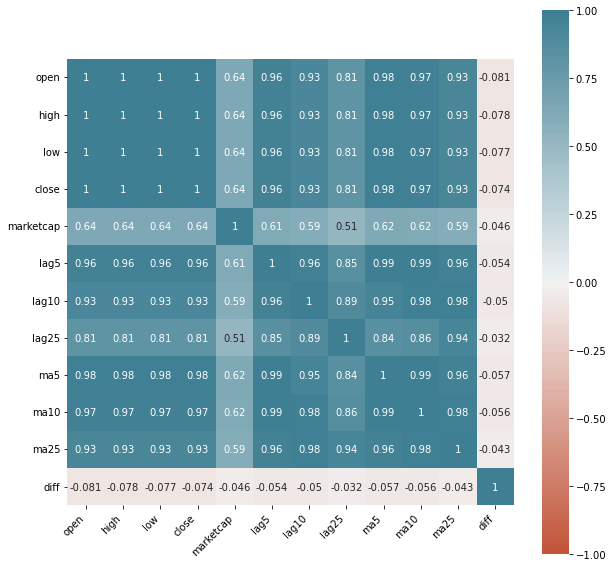

In [33]:
# For correlations, we still just need "scale_cols" columns
# [Q: How should we include weekday when calculating correlations? use some number version encoding or what?]
data_corr = data_scale.drop(columns=['month','year','weekday'])
cor(data_corr, [10,10], 'correlation plot')

## Clustering KMeans

Since we have 44 kinds of coins at hand, it might be hard to directly model all of them together. We used clustering to cluster these coins so that we could fit models separately.

In [34]:
from sklearn.cluster import KMeans

data_cluster = data_scale.copy()
data_cluster = pd.DataFrame(data_cluster['diff']).reset_index()

Here we are dropping off rows containing NAs. 

In [35]:
# Transform shape of df for clustering, drop dates with NaN values so that all coins have vector representation of same size
df_cluster = data_cluster.pivot_table(index = ['symbol_id'], columns = 'date', values = 'diff').dropna(axis=0)
df_cluster.head()

date,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,...,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04
symbol_id,,,,,,,,,,,,,,,,,,,,,
AAVE_7278,0.68503553,-4.35223531,1.59436516,-2.41809938,-2.37169878,0.79459882,1.89397778,-0.12617998,-0.03072695,-1.08126056,...,0.37838268,-0.33020335,0.82729987,0.84599177,-0.57809442,-0.20583972,0.13681979,0.05691234,0.02250244,0.20445517
ADA_2010,-0.00799106,-0.00791169,0.01061822,-0.00448686,-0.00796808,0.00672472,-0.00523010,-0.00062793,0.00062733,0.00502993,...,0.00257768,-0.00056865,0.00267991,-0.00109285,-0.00185837,0.00055215,-0.00052099,0.00051917,0.00255964,-0.00174927
ALGO_4030,-0.01255722,-0.00753895,0.01476480,-0.00819098,-0.00232878,0.00675519,-0.00237494,0.00267685,-0.00038394,0.00227197,...,0.00827415,-0.00503918,0.00069703,-0.00228365,0.00666933,-0.00232180,0.00552650,0.00448921,0.00112467,-0.00144595
APE_18876,0.06422928,-0.07510295,0.13612835,-0.02611382,-0.39936542,0.01703966,0.04040669,-0.17076375,-0.02049752,0.03709951,...,0.01188352,-0.04301249,-0.01073406,0.01955623,-0.03108527,-0.02346764,-0.02468043,0.01029549,0.02553386,-0.00414664
ATOM_3794,-0.33035821,-0.14429269,0.23293285,-0.14989318,-0.24342415,0.22111358,-0.10325137,-0.03443423,-0.03172969,0.08293910,...,0.07844216,0.17047395,0.13420030,-0.10509200,-0.24652821,-0.04120788,-0.07547739,-0.01144977,0.09138382,-0.04027169


Attributes `inertia_` extracts sum of squared distances of samples to their closest cluster center.

In [36]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df_cluster)
    distortions.append(kmeans.inertia_)

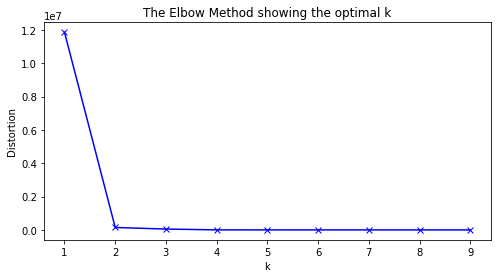

In [37]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Fitting the K-Means, k=2:

In [38]:
# Fitting K-Means using the optimal value from elbow method
kmeans = KMeans(n_clusters = 2, max_iter = 1000).fit(df_cluster.values)
kmeans

KMeans(max_iter=1000, n_clusters=2)

Results:

A interesting finding is that with optimal value $k=2$, there is 2 coin behaves differently from the others, which are `WBTC_3717` and `BTC_1`.

From the close price plot versus time, we can have a more direct view how `WBTC_3717` and `BTC_1` are different from the other coin. 

In [39]:
# Predict cluster labels
labels = kmeans.predict(df_cluster.values)

# Create df aligning labels and coin symbols
df_cluster_result = pd.DataFrame({'labels' : labels, 'symbols' : [r for r in list(df_cluster.index)]})

# Display clustering result
print(df_cluster_result.sort_values('labels'))

    labels     symbols
0        0   AAVE_7278
22       0    ICP_8916
23       0    LEO_3957
24       0   LINK_1975
25       0       LTC_2
26       0   LUNC_4172
27       0   MANA_1966
28       0  MATIC_3890
29       0   NEAR_6535
30       0    OKB_3897
31       0    QNT_3155
32       0   SAND_6210
33       0   SHIB_5994
34       0    SOL_5426
35       0    TRX_1958
36       0    UNI_7083
37       0    VET_3077
39       0     XLM_512
21       0   HBAR_4642
40       0     XMR_328
20       0    FTT_4195
18       0    FIL_2280
1        0    ADA_2010
2        0   ALGO_4030
3        0   APE_18876
4        0   ATOM_3794
5        0   AVAX_5805
6        0    AXS_6783
7        0    BCH_1831
19       0   FLOW_4558
8        0    BNB_1839
10       0    CHZ_4066
11       0    CRO_3635
12       0     DOGE_74
13       0    DOT_6636
14       0   EGLD_6892
15       0    EOS_1765
16       0    ETC_1321
17       0    ETH_1027
41       0    XTZ_2011
38       1   WBTC_3717
9        1       BTC_1


Text(0.5, 1.0, 'Clustering Distribution when k=2')

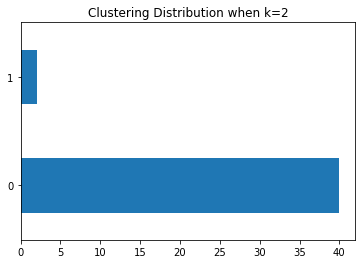

In [40]:
df_cluster_result['labels'].value_counts().plot(kind='barh')
plt.title('Clustering Distribution when k=2')

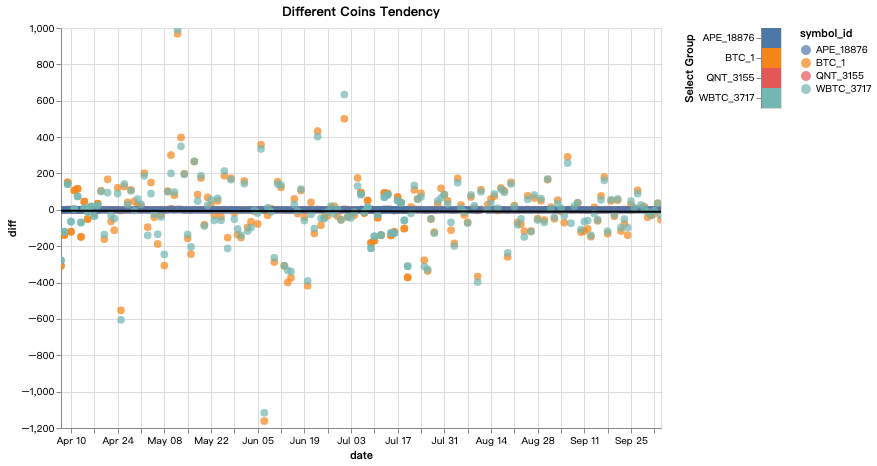

In [41]:
data_knn = data.loc[data.index.unique(level=0).tolist()[-4:-1]+data.index.unique(level=0).tolist()[17:18]].reset_index()
interactive_tendency(data_knn, 'date', 'diff', 'symbol_id', 'time_close', 'Different Coins Tendency', 'Different Coins Tendency_kmeans')

# Modeling

## Data Preparation

### One-hot encoder

We apply one hot encoder on `year`, `month` and `weekday` and separate out a group to identify `BTC_1` and `WBTC_3717` as group1 while others is group2

In [42]:
data_all = data.copy().reset_index().set_index(['symbol_id','date'])
# One hot encoder
data_all = pd.get_dummies(data_all, columns=['weekday', 'month', 'year'])
group1 = ['BTC_1','WBTC_3717']
group2 = [x for x in df_cluster.index.unique(level=0).to_list() if x not in group1]
# Reset index
data_final = data_all.loc[group2].reset_index().dropna()
data_btc = data_all.loc[group1].reset_index().dropna()

### Train-test split

In [43]:
from sklearn.model_selection import train_test_split
np.random.seed(540)

In [44]:
### Non-BTC group
X_train, X_test, y_train, y_test = train_test_split(data_final.drop(columns=['symbol_id','diff','high','low','close','time_close','date','open']),
                                                    data_final['close'], test_size=0.25, random_state=540)

In [45]:
### BTC group
np.random.seed(540)
btc_X_train, btc_X_test, btc_y_train, btc_y_test = train_test_split(data_btc.drop(columns=['symbol_id','diff','high','low','close','time_close','date','open']),
                                                    data_btc['close'],  test_size=0.25,random_state=540)

We will use minmax scaler here to ensure our predictors are in same magnitude. 
Note here we still use the same scaler for training and testing.

MinMax scale fit on training data:

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

Non-BTC group:

In [47]:
### Scale non-BTC group
scaler = MinMaxScaler()
y_scaler = StandardScaler()
minmax_cols = ['marketcap', 'lag5','lag10','lag25', 'ma5', 'ma10', 'ma25'] 
X_train_minmax = X_train[minmax_cols]
X_train_onehot = X_train.drop(columns = minmax_cols)

# MinMax scale specific cols
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_minmax), columns = minmax_cols, index = X_train_minmax.index)
# Assemble X_train again
onehot_list = [x for x in list(X_train.columns) if x not in minmax_cols]
for col in onehot_list:
    X_train_scaled[col] = X_train[col]
# Now the new training data is X_train_scaled

BTC group:

In [48]:
### Scale BTC group
btc_scaler = MinMaxScaler()
y_scaler = StandardScaler()
minmax_cols = ['marketcap', 'lag5','lag10','lag25', 'ma5', 'ma10', 'ma25']
btc_X_train_minmax = btc_X_train[minmax_cols]
btc_X_train_onehot = btc_X_train.drop(columns = minmax_cols)

# MinMax scale specific cols
btc_X_train_scaled = pd.DataFrame(btc_scaler.fit_transform(btc_X_train_minmax), columns = minmax_cols, index = btc_X_train_minmax.index)
# Assemble X_train again
onehot_list = [x for x in list(btc_X_train.columns) if x not in minmax_cols]
for col in onehot_list:
    btc_X_train_scaled[col] = btc_X_train[col]
# Now the new training data is X_train_scaled

MinMax scale fit on test data

Non-BTC group

In [49]:
### Scale non-BTC group
X_test_minmax = X_test[minmax_cols]
X_test_onehot = X_test.drop(columns = minmax_cols)
# Scale X_test corresponding columns
X_test_scaled = pd.DataFrame(scaler.transform(X_test_minmax), columns = minmax_cols, index = X_test_minmax.index)
# Assemble X_test again
onehot_list = [x for x in list(X_test.columns) if x not in minmax_cols]
for col in onehot_list:
    X_test_scaled[col] = X_test[col]

# Now X_test_scaled is the new test data

BTC group:

In [50]:
### Scale BTC group
btc_X_test_minmax = btc_X_test[minmax_cols]
btc_X_test_onehot = btc_X_test.drop(columns = minmax_cols)
# Scale X_test corresponding columns
btc_X_test_scaled = pd.DataFrame(btc_scaler.transform(btc_X_test_minmax), columns = minmax_cols, index = btc_X_test_minmax.index)
# Assemble X_test again
onehot_list = [x for x in list(btc_X_test.columns) if x not in minmax_cols]
for col in onehot_list:
    btc_X_test_scaled[col] = btc_X_test[col]

# Now X_test_scaled is the new test data

## Benchmark LASSO

We choose LASSO as our benchmark model because it will shrink highly correlated features' coefficients to zero, which can help us to do a preliminary feature selection. \
We used cross validation to choose the best LASSO penalty strength. \
The dataset `data_model` drop one level of the multi-index. 

In [51]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

**Non-BTC group**

In [52]:
np.random.seed(1)
parameters = {
    'alpha':[0.001, 0.01, 0.05, 0.1]
}
lasso_reg = GridSearchCV(
    Lasso(max_iter=2000, tol=0.001),
    parameters,
    n_jobs=-1,
    cv = KFold(5, shuffle=True, random_state=540),
    scoring = "neg_mean_squared_error").fit(X_train_scaled,y_train)

In [53]:
print(lasso_reg.best_estimator_)
print(lasso_reg.best_score_)

Lasso(alpha=0.1, max_iter=2000, tol=0.001)
-9632.364380158633


In [54]:
print("non-BTC group:")
lasso_reg = Lasso(alpha=0.1).fit(X_train_scaled,y_train)
pd.DataFrame(lasso_reg.coef_, index=X_train_scaled.columns).sort_values([0],ascending=False)

non-BTC group:


,0
marketcap,3152.81750801
ma5,208.64441363
month_Jul,1.04981985
weekday_Wednesday,0.67709651
month_Sep,0.03552067
lag5,0.00000000
month_Oct,0.00000000
month_Jun,-0.00000000
month_Aug,-0.00000000
weekday_Tuesday,0.00000000


To construct these Dataframes, we need to transform y back to 1 dimensional.

In [55]:
### predict on train
y_pred_train = lasso_reg.predict(X_train_scaled)
trainp_df = pd.DataFrame(y_train.copy(), index = y_train.index)
trainp_df.columns = ['y']
trainp_df['y_pred'] = y_pred_train
trainp_df = trainp_df.assign(error_result = np.abs(y_train.to_numpy().squeeze()-y_pred_train))

In [56]:
### predict on test
y_pred_test = lasso_reg.predict(X_test_scaled)
testp_df = pd.DataFrame(y_test.copy(), index = y_test.index)
testp_df.columns = ['y']
testp_df['y_pred'] = y_pred_test
#testp_df = pd.DataFrame({'y':y_test.to_numpy().squeeze(),'y_pred':y_pred_test})
testp_df = testp_df.assign(error_result = np.abs(y_test.to_numpy().squeeze()-y_pred_test))

In [57]:
pred_df = pd.concat([trainp_df.assign(tag='train'), testp_df.assign(tag='test')], 
                    axis=0)
pred_df

,y,y_pred,error_result,tag
8028,213.62644646,11.33277632,202.29367014,train
3759,8.22640812,5.20907988,3.01732824,train
7931,0.10673343,10.73374623,10.62701280,train
1428,13.21115718,-2.20724622,15.41840341,train
8303,1.54206679,-0.70827263,2.25033942,train
...,...,...,...,...
5858,0.74011658,40.97131386,40.23119728,test
4024,41.92569967,24.80320490,17.12249477,test
6988,33.59932272,82.58544742,48.98612469,test
5274,88.46827651,228.03604946,139.56777295,test


In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

def errors(dataset, y, yhat):
    mae = mean_absolute_error(y, yhat)
    mse = mean_squared_error(y, yhat)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y,yhat)
    errors = pd.DataFrame([{'mae': mae,'mse': mse,'rmse': rmse,'r^2': r2}])
    errors.index = [dataset]
    return errors

In [60]:
lasso_df = pd.concat([errors("lasso_test",testp_df["y"],testp_df["y_pred"]), 
         errors("lasso_train",trainp_df["y"],trainp_df["y_pred"])])

Text(0.5, 20.799999999999983, 'y_true')

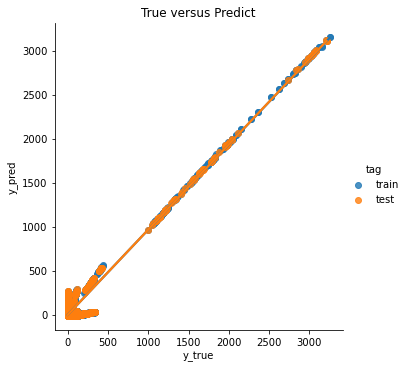

In [61]:
sns.lmplot(x='y', y ='y_pred', data=pred_df,hue='tag')
plt.title('True versus Predict')
plt.xlabel('y_true')

<AxesSubplot:xlabel='tag', ylabel='error_result'>

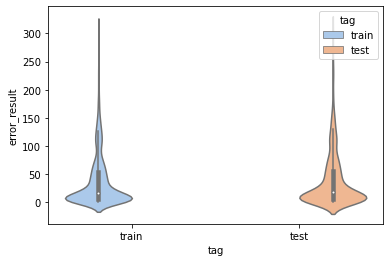

In [62]:
sns_c = sns.color_palette(palette='pastel')
sns.violinplot(x='tag', y='error_result', data=pred_df, hue='tag'
               , palette=[sns_c[0], sns_c[1]])

In [63]:
data_comparison = pd.concat([data_final, pred_df['y_pred']],axis = 1).rename(columns={"y_pred" : "close_pred"})
data_comparison = data_comparison.set_index(['symbol_id','date'])

In [64]:
def true_pred_plot(data,indexname):
    fig, ax = plt.subplots(figsize=(10, 4))
    
    ax.plot(data['close'], label= 'raw data')
    ax.plot(data['close_pred'], label= 'predicted')
    
    ax.legend(loc='upper left')
    ax.set_ylabel('numbers')
    ax.set_xlabel('year-week')
    ax.set_title(indexname)

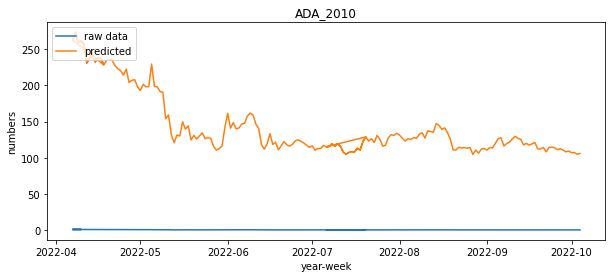

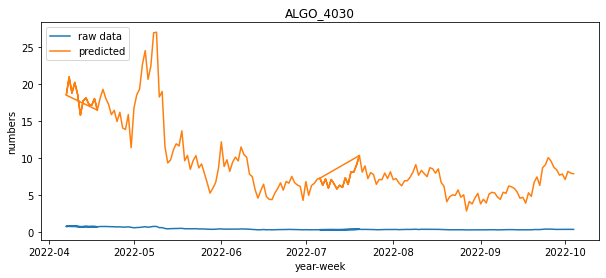

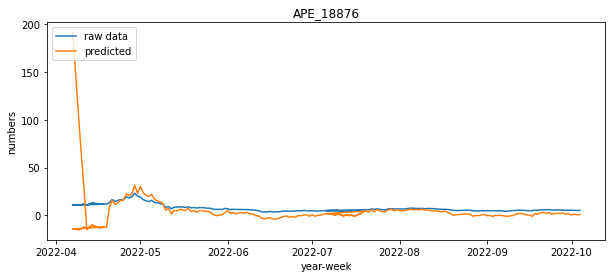

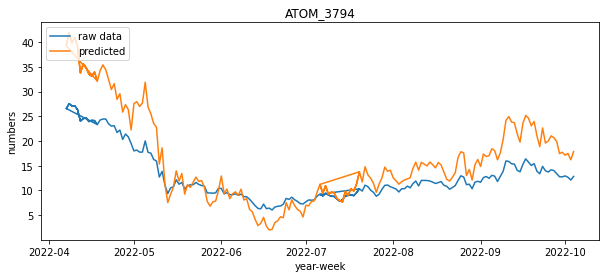

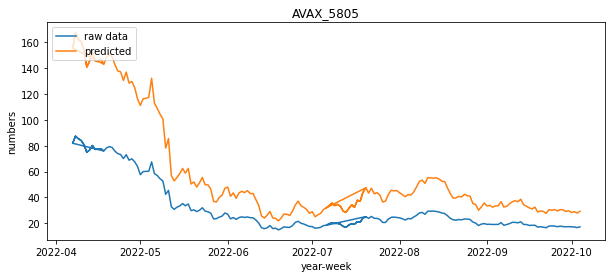

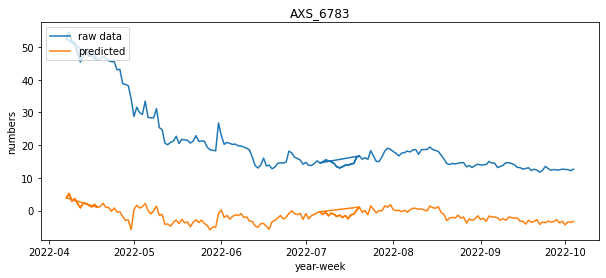

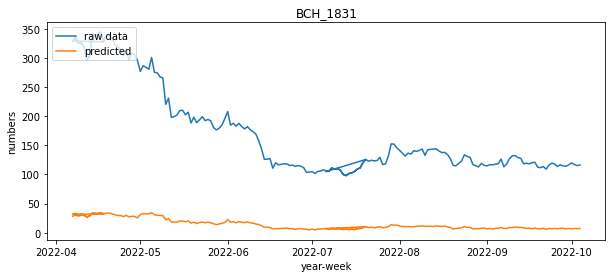

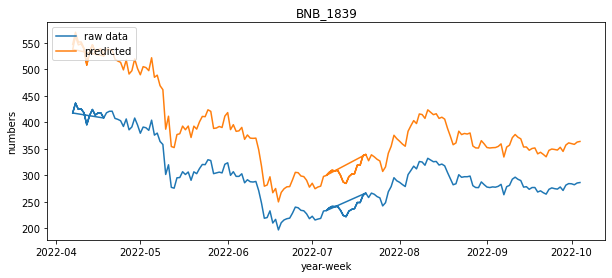

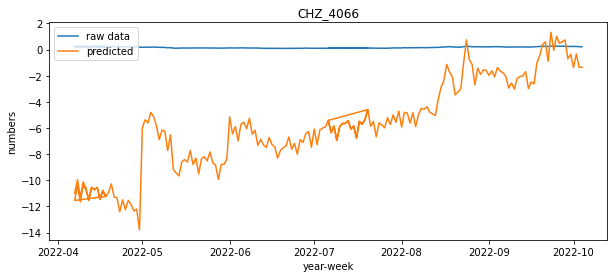

In [65]:
for indexname in group2[1:10]:
    pd.options.display.float_format = '{:.8f}'.format
    true_pred_plot(data_comparison.loc[indexname],indexname)

**For BTC group**

In [66]:
np.random.seed(1)
### BTC group
btc_lasso_reg = GridSearchCV(
    Lasso(max_iter=2000, tol=0.001),
    parameters,
    n_jobs=-1,
    cv = KFold(5, shuffle=True, random_state=540),
    scoring = "neg_mean_squared_error").fit(btc_X_train_scaled,btc_y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.302e+07, tolerance: 1.958e+07
  model = cd_fast.enet_coordinate_descent(


In [67]:
### BTC group
print(btc_lasso_reg.best_estimator_)
print(btc_lasso_reg.best_score_)

Lasso(alpha=0.1, max_iter=2000, tol=0.001)
-6133475.104256188


In [68]:
print("BTC group:")
btc_lasso_reg = Lasso(alpha=0.1).fit(btc_X_train_scaled,btc_y_train)
pd.DataFrame(btc_lasso_reg.coef_, index=btc_X_train_scaled.columns).sort_values([0],ascending=False)

BTC group:


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.303e+07, tolerance: 1.958e+06
  model = cd_fast.enet_coordinate_descent(


,0
ma5,25889.20609172
month_Apr,11753.95051232
month_May,5717.19764682
lag10,2162.95150481
ma10,1253.41777069
month_Jun,839.91688064
lag25,635.28926501
marketcap,592.21004284
weekday_Friday,298.95000666
weekday_Saturday,213.45623045


In [69]:
### predict on train
btc_y_pred_train = btc_lasso_reg.predict(btc_X_train_scaled)
btc_trainp_df = pd.DataFrame(btc_y_train.copy(), index = btc_y_train.index)
btc_trainp_df.columns = ['y']
btc_trainp_df['y_pred'] = btc_y_pred_train
btc_trainp_df = btc_trainp_df.assign(error_result = np.abs(btc_y_train.to_numpy().squeeze()-btc_y_pred_train))

In [70]:
### predict on test
btc_y_pred_test = btc_lasso_reg.predict(btc_X_test_scaled)
btc_testp_df = pd.DataFrame(btc_y_test.copy(), index = btc_y_test.index)
btc_testp_df.columns = ['y']
btc_testp_df['y_pred'] = btc_y_pred_test
btc_testp_df = btc_testp_df.assign(error_result = np.abs(btc_y_test.to_numpy().squeeze()-btc_y_pred_test))

In [71]:
btc_pred_df = pd.concat([btc_trainp_df.assign(tag='train'), btc_testp_df.assign(tag='test')], 
                    axis=0)
btc_pred_df

,y,y_pred,error_result,tag
294,20586.89150410,22281.61074966,1694.71924556,train
219,42973.25066787,42025.04993201,948.20073586,train
9,40562.41866338,40897.74107429,335.32241091,train
324,20266.99194949,21415.37154377,1148.37959429,train
165,21408.83286497,21713.54050008,304.70763511,train
...,...,...,...,...
51,31060.86530850,30537.06284734,523.80246117,test
183,21560.87180200,19991.44864994,1569.42315206,test
198,18807.78846824,19442.87871985,635.09025161,test
60,29614.78276179,30769.67618418,1154.89342238,test


In [72]:
lasso_btc_df = pd.concat([errors("lasso_btc_test",btc_testp_df["y"],btc_testp_df["y_pred"]), 
         errors("lasso_btc_train",btc_trainp_df["y"],btc_trainp_df["y_pred"])])

Text(0.5, 20.80000000000002, 'y_true')

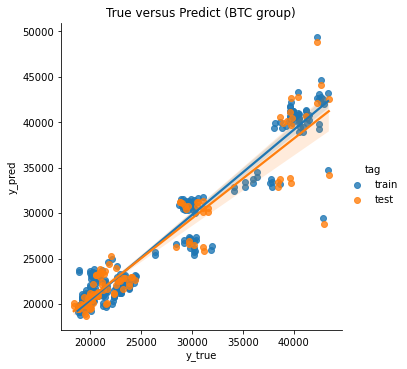

In [73]:
sns.lmplot(x='y', y ='y_pred', data=btc_pred_df,hue='tag')
plt.title('True versus Predict (BTC group)')
plt.xlabel('y_true')

In [74]:
data_comparison = pd.concat([data_btc, btc_pred_df['y_pred']],axis = 1).rename(columns={"y_pred" : "close_pred"})
data_comparison = data_comparison.set_index(['symbol_id','date'])

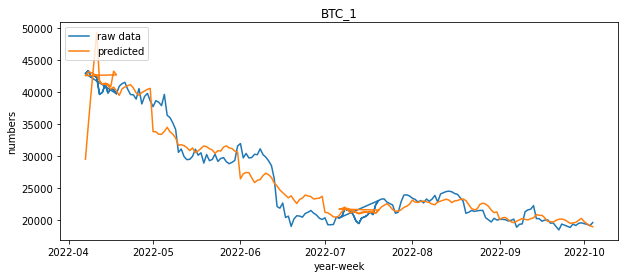

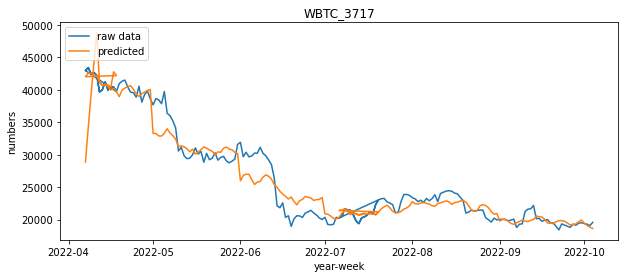

In [75]:
for indexname in group1[0:2]:
    pd.options.display.float_format = '{:.8f}'.format
    true_pred_plot(data_comparison.loc[indexname],indexname)

## Random Forest

Since different coins have different price levels, we think it might be more appropriate to model the difference between everyday's close price and open price if we want to build general models.

### One-hot encoder

In [76]:
data_rf = data.copy().reset_index().set_index(['symbol_id','date'])
# One hot encoder
data_rf = pd.get_dummies(data_rf, columns=['weekday', 'month', 'year'])
group1 = ['BTC_1','WBTC_3717']
group2 = [x for x in data_rf.index.unique(level=0).to_list() if x not in group1]
# Reset index
data_final = data_rf.loc[group2].reset_index().dropna()
data_btc = data_rf.loc[group1].reset_index().dropna()

### Train-test split

Non-BTC group split

In [77]:
np.random.seed(540)

# Stratify split
X_train, X_test, y_train, y_test = train_test_split(data_final.drop(columns=['symbol_id','diff','high','low','close','time_close', 'date']),
                                                    data_final['diff'], stratify=data_final.symbol_id, test_size=0.25, random_state=540)

BTC group

In [78]:
# Stratify split
np.random.seed(540)
btc_X_train, btc_X_test, btc_y_train, btc_y_test = train_test_split(data_btc.drop(columns=['symbol_id','diff','high','low','close','time_close', 'date']),
                                                    data_btc['diff'], stratify=data_btc.symbol_id, test_size=0.25,random_state=540)

### Standardize data

In order to have more precise dataset satisfied future modelling's assumptions, we use MinMax again, similar to what we did before clustering, to standardize each feature.

For the MinMaxScaler, we need to fit and transform on training dataset, then fit it on the testing dataset.

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

Fit on training data

1. Non-BTC group

In [80]:
### Scale non-BTC group
scaler = MinMaxScaler()
y_scaler = StandardScaler()
minmax_cols = ['open','marketcap', 'lag5','lag10','lag25', 'ma5', 'ma10', 'ma25']
X_train_minmax = X_train[minmax_cols]
X_train_onehot = X_train.drop(columns = minmax_cols)

# MinMax scale specific cols
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_minmax), columns = minmax_cols, index = X_train_minmax.index)
# Assemble X_train again
onehot_list = [x for x in list(X_train.columns) if x not in minmax_cols]
for col in onehot_list:
    X_train_scaled[col] = X_train[col]
# Now the new training data is X_train_scaledb

In [81]:
# Scale y_train
y_train_array = np.array(y_train).reshape(-1,1)
y_train = pd.DataFrame(y_scaler.fit_transform(y_train_array), index = y_train.index)

2. BTC group

In [82]:
### Scale BTC group
btc_scaler = MinMaxScaler()
btc_y_scaler = StandardScaler()
minmax_cols = ['open','marketcap', 'lag5','lag10','lag25', 'ma5', 'ma10', 'ma25'] # remove: low 
btc_X_train_minmax = btc_X_train[minmax_cols]
btc_X_train_onehot = btc_X_train.drop(columns = minmax_cols)

# MinMax scale specific cols
btc_X_train_scaled = pd.DataFrame(btc_scaler.fit_transform(btc_X_train_minmax), columns = minmax_cols, index = btc_X_train_minmax.index)
# Assemble X_train again
onehot_list = [x for x in list(btc_X_train.columns) if x not in minmax_cols]
for col in onehot_list:
    btc_X_train_scaled[col] = btc_X_train[col]
# Now the new training data is X_train_scaled

In [83]:
# Scale btc_y_train
btc_y_train_array = np.array(btc_y_train).reshape(-1,1)
btc_y_train = pd.DataFrame(btc_y_scaler.fit_transform(btc_y_train_array), index = btc_y_train.index)

Apply the scaler on testing data

1. Non-BTC group

In [84]:
### Scale non-BTC group
X_test_minmax = X_test[minmax_cols]
X_test_onehot = X_test.drop(columns = minmax_cols)
# Scale X_test corresponding columns
X_test_scaled = pd.DataFrame(scaler.transform(X_test_minmax), columns = minmax_cols, index = X_test_minmax.index)
# Assemble X_test again
onehot_list = [x for x in list(X_test.columns) if x not in minmax_cols]
for col in onehot_list:
    X_test_scaled[col] = X_test[col]

# Now X_test_scaled is the new test data

In [85]:
# Apply to y_test
y_test_array = np.array(y_test).reshape(-1,1)
y_test = pd.DataFrame(y_scaler.transform(y_test_array), index = y_test.index)

2. BTC group

In [86]:
### Scale BTC group
btc_X_test_minmax = btc_X_test[minmax_cols]
btc_X_test_onehot = btc_X_test.drop(columns = minmax_cols)
# Scale X_test corresponding columns
btc_X_test_scaled = pd.DataFrame(btc_scaler.transform(btc_X_test_minmax), columns = minmax_cols, index = btc_X_test_minmax.index)
# Assemble X_test again
onehot_list = [x for x in list(btc_X_test.columns) if x not in minmax_cols]
for col in onehot_list:
    btc_X_test_scaled[col] = btc_X_test[col]

# Now X_test_scaled is the new test data

In [87]:
# Apply to btc_y_test
btc_y_test_array = np.array(btc_y_test).reshape(-1,1)
btc_y_test = pd.DataFrame(btc_y_scaler.transform(btc_y_test_array), index = btc_y_test.index)

### Fit Non-BTC group

In [100]:
np.random.seed(540)
parameters = {
    'n_estimators':[5,10,25,35,40,45],
    'max_depth': [3,5,9,14,19,21,24,27]
}
rf_reg = GridSearchCV(
    RandomForestRegressor(),
    parameters,
    n_jobs=-1,
    cv = KFold(5, shuffle=True, random_state=540),
    scoring = "r2").fit(X_train_scaled,y_train.to_numpy().squeeze())
    # adjust input size for method requirement

In [101]:
rf_reg.best_estimator_

RandomForestRegressor(max_depth=27, n_estimators=35)

In [102]:
rf_reg.best_score_

0.3492172480827288

In [103]:
rf_reg = RandomForestRegressor(max_depth=27, n_estimators=35).fit(X_train_scaled,y_train.to_numpy().squeeze())

In [104]:
### predict on test
y_pred_test = rf_reg.predict(X_test_scaled)

testp_df = pd.DataFrame(y_test.copy(), index = y_test.index)
testp_df.columns = ['y']
# Add pred value column
testp_df['y_pred'] = y_pred_test

testp_df['absolute_error'] = np.abs(testp_df['y'] - testp_df['y_pred'])

In [105]:
### predict on train
y_pred_train = rf_reg.predict(X_train_scaled)
#trainp_df = pd.DataFrame({'y_':y_train.to_numpy().squeeze(),'y_pred':y_pred_train})

trainp_df = pd.DataFrame(y_train.copy(), index = y_train.index)
trainp_df.columns = ['y']
# Add pred value column
trainp_df['y_pred'] = y_pred_train

trainp_df['absolute_error'] = np.abs(trainp_df['y'] - trainp_df['y_pred'])

In [106]:
pred_df_rf = pd.concat([trainp_df.assign(tag='train'), testp_df.assign(tag='test')], 
                    axis=0)
pred_df_rf

,y,y_pred,absolute_error,tag
372,-0.06402566,-0.00085463,0.06317103,train
544,0.06363160,0.01069507,0.05293653,train
612,0.02737339,0.01210195,0.01527143,train
7132,0.01948429,0.00848129,0.01100300,train
4321,0.02406008,0.05681033,0.03275025,train
...,...,...,...,...
6109,0.01168897,0.01231181,0.00062285,test
5402,0.01224745,0.01210195,0.00014550,test
6322,0.00854407,0.01210257,0.00355850,test
1975,0.00521091,0.01210195,0.00689104,test


In [107]:
rf_df = pd.concat([errors("rf_test",testp_df["y"],testp_df["y_pred"]), 
         errors("rf_train",trainp_df["y"],trainp_df["y_pred"])])

Random Forest turns out much better than lasso regression, however, we have overfitting problem as testing errors is greater than training. 

Text(0.5, 20.80000000000002, 'y_true')

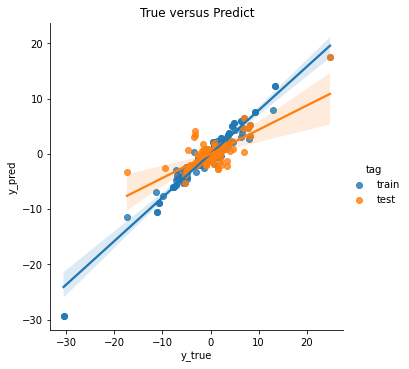

In [108]:
sns.lmplot(x='y', y ='y_pred', data=pred_df_rf,hue='tag')
plt.title('True versus Predict')
plt.xlabel('y_true')

Plot real value and prediction for comparison

In [109]:
data_comparison = pd.concat([data_final,  pd.DataFrame(y_scaler.inverse_transform(pd.DataFrame(pred_df_rf['y_pred'])), columns = ["diff_pred"]
                                                        ,index = pred_df_rf.index)],axis = 1)
data_comparison = data_comparison.set_index(['symbol_id','date'])
data_comparison

time_close       open       high  \
symbol_id  date                                                                 
THETA_2416 2022-04-20  2022-04-20 00:59:59.999000+00:00 3.15148653 3.15318740   
           2022-04-21  2022-04-21 00:59:59.999000+00:00 3.09511521 3.15465656   
           2022-04-22  2022-04-22 00:59:59.999000+00:00 3.26130474 3.28223095   
           2022-04-23  2022-04-23 00:59:59.999000+00:00 3.13269129 3.15057851   
           2022-04-24  2022-04-24 00:59:59.999000+00:00 3.10680048 3.19453398   
...                                                 ...        ...        ...   
TON_11419  2022-09-30  2022-09-30 00:59:59.999000+00:00 1.30286767 1.30425070   
           2022-10-01  2022-10-01 00:59:59.999000+00:00 1.36473776 1.36596888   
           2022-10-02  2022-10-02 00:59:59.999000+00:00 1.38886060 1.39066777   
           2022-10-03  2022-10-03 00:59:59.999000+00:00 1.36192401 1.36920406   
           2022-10-04  2022-10-04 00:59:59.999000+00:00 1.34799625 1.35035898   

                             low      close           marketcap       lag5  \
symbol_id  date                                                              
THETA_2416 2022-04-20 3.10384332 3.11602902 3116029016.30000019 3.03929108   
           2022-04-21 3.09396452 3.15465656 3154656562.26000023 3.06342827   
           2022-04-22 3.22818160 3.26173870 3261738704.13000011 3.04123483   
           2022-04-23 3.09488492 3.10125327 3101253265.30999994 2.88200690   
           2022-04-24 3.10536877 3.17746122 3177461224.48999977 3.06870298   
...                          ...        ...                 ...        ...   
TON_11419  2022-09-30 1.29963555 1.30319318 1591721689.03999996 1.29703310   
           2022-10-01 1.36030226 1.36355643 1665449431.06999993 1.27723333   
           2022-10-02 1.38644199 1.38829518 1695665368.90000010 1.28485592   
           2022-10-03 1.36192401 1.36756501 1670345512.35999990 1.30145792   
           2022-10-04 1.34529836 1.34529836 1643149009.17000008 1.32047354   

                           lag10      lag25        ma5  ...  \
symbol_id  date                                         ...   
THETA_2416 2022-04-20 3.43595358 3.27638495 3.01893281  ...   
           2022-04-21 3.31615897 3.47804523 3.03428040  ...   
           2022-04-22 3.02836526 3.40470991 3.05252606  ...   
           2022-04-23 3.08717131 3.43595358 3.09662683  ...   
           2022-04-24 3.17310171 3.31615897 3.14047610  ...   
...                          ...        ...        ...  ...   
TON_11419  2022-09-30 1.48478182 1.47276567 1.29621076  ...   
           2022-10-01 1.40478122 1.69784089 1.29744278  ...   
           2022-10-02 1.33435514 1.66541967 1.31470740  ...   
           2022-10-03 1.47664350 1.87824340 1.33539525  ...   
           2022-10-04 1.35090653 1.84936678 1.34861667  ...   

                       weekday_Wednesday  month_Apr  month_Aug  month_Jul  \
symbol_id  date                                                             
THETA_2416 2022-04-20                  1          1          0          0   
           2022-04-21                  0          1          0          0   
           2022-04-22                  0          1          0          0   
           2022-04-23                  0          1          0          0   
           2022-04-24                  0          1          0          0   
...                                  ...        ...        ...        ...   
TON_11419  2022-09-30                  0          0          0          0   
           2022-10-01                  0          0          0          0   
           2022-10-02                  0          0          0          0   
           2022-10-03                  0          0          0          0   
           2022-10-04                  0          0          0          0   

                       month_Jun  month_May  month_Oct  month_Sep  year_2022  \
symbol_id  date                                                           

In [110]:
# Function for plotting true value - predicted value
def true_pred_plot(data):
    fig, ax = plt.subplots(figsize=(10, 4))
    
    ax.plot(data['diff'], label= 'raw data')
    ax.plot(data['diff_pred'], label= 'predicted')
    
    ax.legend(loc='upper left')
    ax.set_ylabel('numbers')
    ax.set_xlabel('year-week')
    ax.set_title('True Value v.s. Predicted Value -- Daily difference(RF Regressor)')

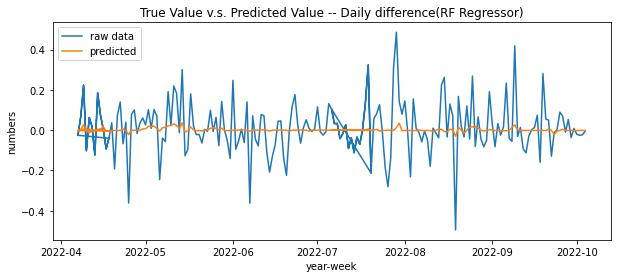

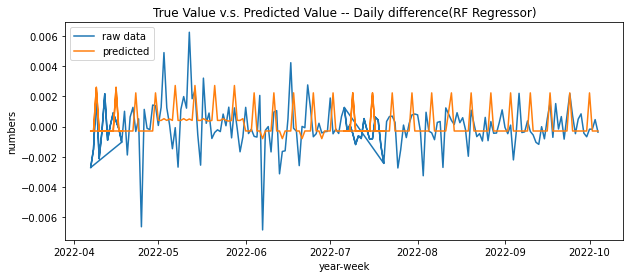

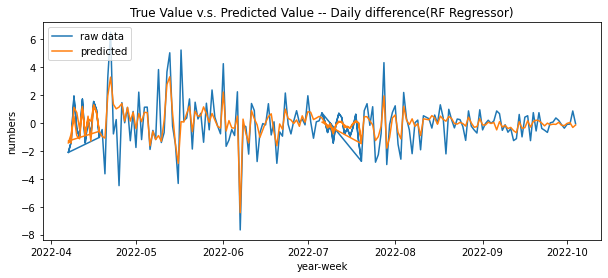

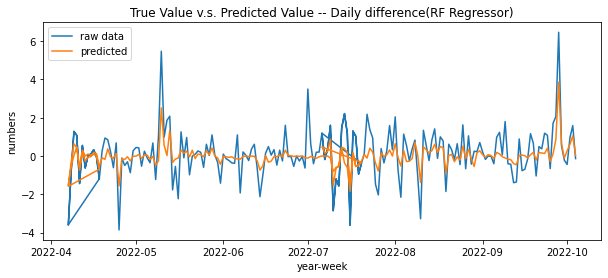

In [111]:
for indexname in group2[-6:-2]:
    pd.options.display.float_format = '{:.8f}'.format
    true_pred_plot(data_comparison.loc[indexname])

### Fit BTC group

In [112]:
np.random.seed(540)
btc_rf_reg = GridSearchCV(
    RandomForestRegressor(),
    parameters,
    n_jobs=-1,
    cv = KFold(5, shuffle=True, random_state=540),
    scoring = "neg_mean_squared_error").fit(btc_X_train_scaled,btc_y_train.to_numpy().squeeze())
    # adjust input size for method requirement

In [113]:
btc_rf_reg.best_estimator_

RandomForestRegressor(max_depth=19, n_estimators=35)

In [114]:
btc_rf_reg = RandomForestRegressor(max_depth=19, n_estimators=35).fit(btc_X_train_scaled,btc_y_train.to_numpy().squeeze())

In [115]:
### predict on test
btc_y_pred_test = btc_rf_reg.predict(btc_X_test_scaled)

btc_testp_df = pd.DataFrame(btc_y_test.copy(), index = btc_y_test.index)
btc_testp_df.columns = ['y']
# Add pred value column
btc_testp_df['y_pred'] = btc_y_pred_test

btc_testp_df['absolute_error'] = np.abs(btc_testp_df['y'] - btc_testp_df['y_pred'])

In [116]:
### predict on train
btc_y_pred_train = btc_rf_reg.predict(btc_X_train_scaled)
#trainp_df = pd.DataFrame({'y_':y_train.to_numpy().squeeze(),'y_pred':y_pred_train})

btc_trainp_df = pd.DataFrame(btc_y_train.copy(), index = btc_y_train.index)
btc_trainp_df.columns = ['y']
# Add pred value column
btc_trainp_df['y_pred'] = btc_y_pred_train

btc_trainp_df['absolute_error'] = np.abs(btc_trainp_df['y'] - btc_trainp_df['y_pred'])

In [117]:
btc_pred_df_rf = pd.concat([btc_trainp_df.assign(tag='train'), btc_testp_df.assign(tag='test')], 
                    axis=0)
btc_pred_df_rf

,y,y_pred,absolute_error,tag
112,-0.63442581,-0.50141860,0.13300721,train
72,2.17201760,1.52675755,0.64526004,train
128,0.48764038,0.25342883,0.23421154,train
391,-0.27074437,-0.32478092,0.05403655,train
194,-0.60669785,-0.53715286,0.06954499,train
...,...,...,...,...
352,-1.08821349,-0.21697436,0.87123913,test
45,1.83810752,0.66820857,1.16989894,test
88,-0.68337207,-0.35726010,0.32611197,test
86,-2.36797249,-0.93594420,1.43202828,test


Here the result is better than non-BTC group, while at the same time we observe overfitting.

In [118]:
rf_btc_df = pd.concat([errors("rf_btc_test",btc_testp_df["y"],btc_testp_df["y_pred"]), 
         errors("rf_btc_train",btc_trainp_df["y"],btc_trainp_df["y_pred"])])

Text(0.5, 20.80000000000002, 'y_true')

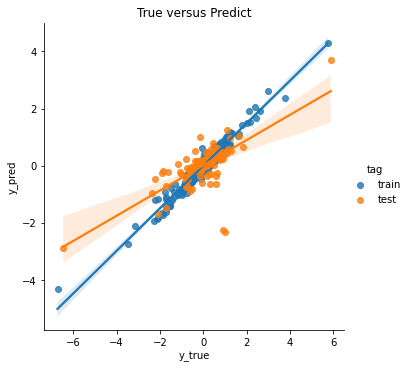

In [119]:
sns.lmplot(x='y', y ='y_pred', data=btc_pred_df_rf,hue='tag')
plt.title('True versus Predict')
plt.xlabel('y_true')

In [120]:
btc_data_comparison = pd.concat([data_btc, pd.DataFrame(btc_y_scaler.inverse_transform(pd.DataFrame(btc_pred_df_rf['y_pred'])), columns = ["diff_pred"]
                                                        ,index = btc_pred_df_rf.index)], axis = 1)
btc_data_comparison = btc_data_comparison.set_index(['symbol_id','date'])

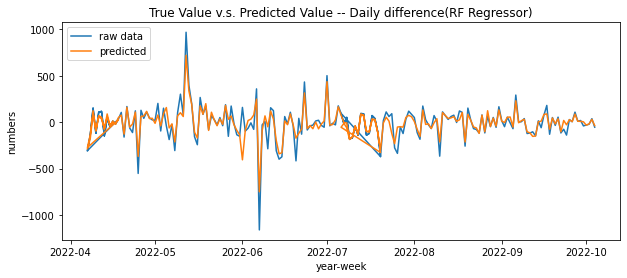

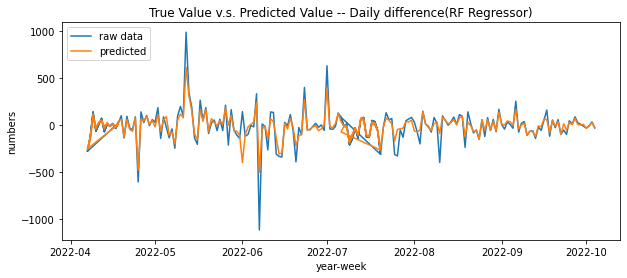

In [121]:
for indexname in group1:
    pd.options.display.float_format = '{:.8f}'.format
    true_pred_plot(btc_data_comparison.loc[indexname])

## VAR

### Time series train test split

Coin `TON_11419` and `THETA_2416` are missing part of the data, we delete this coin here. \
We will first focus on coins without `BTC_1` and `WBTC_3717` according to our clustering result.

In [122]:
from statsmodels.tsa.api import VAR
data_all = data.copy().reset_index().set_index(['symbol_id','date'])
# One hot encoder
data_all = pd.get_dummies(data_all, columns=['weekday', 'month', 'year'])

We select date from `2022-04-07` to `2022-10-01` as our training set to predict future 12 days. 

In [123]:
data_all = data_all.reset_index()
X_train = data_all[data_all.date.isin(pd.date_range(start="2022-04-07",end="2022-9-22"))]
X_test = data_all[data_all.date.isin(pd.date_range(start="2022-9-23",end="2022-10-04"))]

In [124]:
X_train = X_train.reset_index()[['symbol_id','date','close']]
X_test = X_test.reset_index()[['symbol_id','date','close']]
X_train = pd.DataFrame(X_train.pivot_table(index='date',columns='symbol_id'))
X_test = pd.DataFrame(X_test.pivot_table(index='date',columns='symbol_id'))

In [125]:
X_train.columns = X_train.columns.droplevel()
X_test.columns = X_test.columns.droplevel()
X_train_group1 = X_train.drop(columns=['TON_11419','BTC_1','WBTC_3717','THETA_2416'])
X_test_group1 = X_test.drop(columns=['TON_11419','BTC_1','WBTC_3717','THETA_2416'])

set_index =  pd.date_range(start="2022-9-23",end="2022-10-04")

In [126]:
def VAR_result(X_train, X_test, i, row, col):
    #pre process
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    #model
    model_var = VAR(X_train_scaled)
    result = model_var.fit(i)
    
    #forecast
    forecast_input = X_train_scaled
    fc = result.forecast(y=forecast_input, steps=i)
    df_forecast = pd.DataFrame(fc, index= set_index, columns=X_train.columns + '_forecast')
    df_forecast = pd.DataFrame(scaler.inverse_transform(df_forecast),columns=X_train.columns)
    
    #plot
    fig, axes = plt.subplots(row, col, figsize=(20,5), sharex=True)
    for i, (col,ax) in enumerate(zip(X_train.columns[0:10], axes.flat)):
        date_list = pd.date_range(start="2022-9-23",end="2022-10-04")
        lista = X_test.iloc[:,i].values
        listb = df_forecast.iloc[:,i]
        df = pd.DataFrame({'date':date_list,'true':lista, 'predict': listb})
        df.plot(x='date', ax=ax)
        plt.margins(x=0, y=0)
        ax.set_title(col)
        
    return df_forecast

In [127]:
### Selecting i for generating result

# model_var = VAR(X_train_scaled)

# for i in [1,4,5,6,7,8,9,10,11,12]:
#     result = model_var.fit(i)
#     print('Lag Order =', i)
#     print('AIC : ', result.aic)
#     print('BIC : ', result.bic)

### Non-BTC group

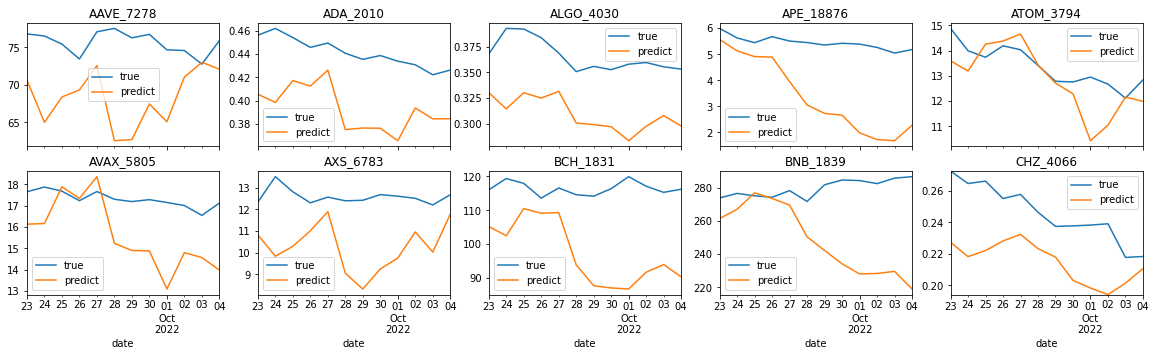

In [128]:
df_forecast = VAR_result(X_train= X_train_group1, X_test= X_test_group1, i=12, row=2, col=5)

In [129]:
y = []
y_pred = []
for i in range(len(df_forecast.columns)):
    y_pred.append(df_forecast.iloc[:,i].values)
    y.append(X_test_group1.iloc[:,i].values)
y_pred = np.concatenate(y_pred).ravel()
y = np.concatenate(y).ravel()
var_df = pd.concat([errors("VAR",y,y_pred)])

### BTC group

Now we change our focus to group 2 which includes: `BTC_1` and `WBTC_3717`

In [130]:
X_train_group2 = X_train[['BTC_1','WBTC_3717']]
X_test_group2 = X_test[['BTC_1','WBTC_3717']]

set_index = pd.date_range(start="2022-9-23",end="2022-10-04")

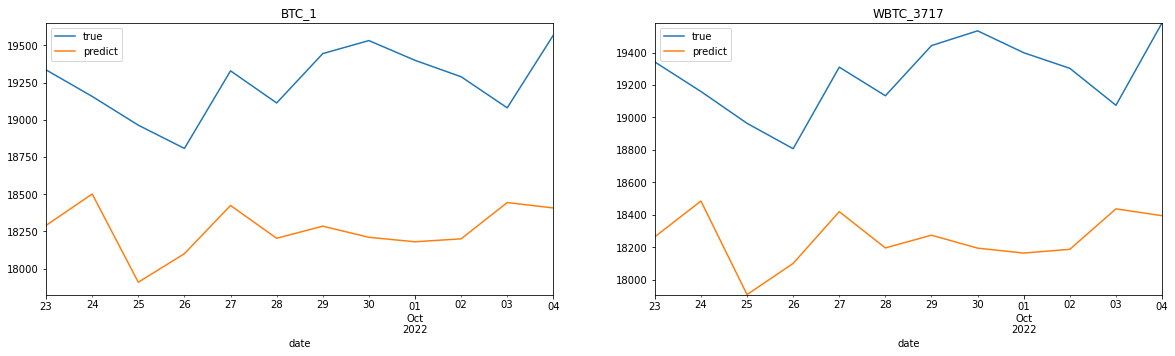

In [131]:
btc_df_forecast = VAR_result(X_train= X_train_group2, X_test= X_test_group2, i=12, row=1,col=2)

In [132]:
btc_y = []
btc_y_pred = []
for i in range(len(btc_df_forecast.columns)):
    btc_y_pred.append(btc_df_forecast.iloc[:,i].values)
    btc_y.append(X_test_group2.iloc[:,i].values)
btc_y_pred = np.concatenate(btc_y_pred).ravel()
btc_y = np.concatenate(btc_y).ravel()
var_btc_df = pd.concat([errors("btc_VAR",btc_y,btc_y_pred)])

## RNN with Tensorflow

We also tried RNN, but given the time we had and our proficiency in building Neural Network, we didn't come up with a RNN model for generalized prediction. RNN for individual crypto was tried but the results are not satisfactory, so we just list the codes here.

### Prepare dataset

In [ ]:
import os
import matplotlib.pyplot as plt
from IPython.display import Image
import sys, os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import random,os
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader, Subset
from collections import OrderedDict

In [ ]:
data_all = data.copy().reset_index().set_index(['symbol_id','date'])
group2 = ['BTC_1','WBTC_3717']
group1 = [x for x in data_all.index.unique(level=0).to_list() if x not in group2]

rnn_group1 = df_cluster.loc[group1].T
rnn_group2 = df_cluster.loc[group2].T

In [ ]:
def to_tensor(data,
              date_features=None,
              add_cyclic_date=False,
              lookback=12,
              transformer_x=None,
              use_transformer=False,
              # return_time_idx=False,
              rolling_split=False,
              verbose=False):
    """
    Transform inputs to 3-D tensors
    and y as the one time step ahead.


    Args:
        * data: data to create time series targets and features for
        LSTM.
        * lookback:

    ---
    Shape of data:
        features: (total trading days, history for regression, no of features)
        labels: (total trading days, no of features)

    Return:
    """

    if add_cyclic_date:
        x = np.concatenate((data, date_features), axis=1)
    # just do a copy of same data
    else:
        x = data
    y = data

    # repeat this for train-val-test
    xtrain, xval, ytrain, yval = train_test_split(
        x, y, shuffle=False, random_state=42, test_size=0.25)

    xval, xtest, yval, ytest = train_test_split(
        xval, yval, shuffle=False, random_state=42, test_size=0.5)

    imputer_x = SimpleImputer(strategy='median')
    xtrain = imputer_x.fit_transform(xtrain)
    xval = imputer_x.transform(xval)
    xtest = imputer_x.transform(xtest)

    imputer_y = SimpleImputer(strategy='median')
    ytrain = imputer_y.fit_transform(ytrain)
    yval = imputer_y.transform(yval)
    ytest = imputer_y.transform(ytest)

    if use_transformer:
        if transformer_x is None:
            transformer_x = MinMaxScaler()
            xtrain = transformer_x.fit_transform(xtrain)
            xval = transformer_x.transform(xval)
            xtest = transformer_x.transform(xtest)

    xtrain, ytrain = helper_train_test(xtrain, ytrain, lookback)
    xval, yval = helper_train_test(xval, yval, lookback)
    xtest, ytest = helper_train_test(xtest, ytest, lookback)

    return xtrain, xval, xtest, ytrain, yval, ytest

In [ ]:
def data_pipe(df,
              transformer_x=None,
              use_transformer=False,
              # return_time_idx=True,
              use_tf_data=False,
              add_cyclic_date=False):
    """Data pipe splits data in train-val-test, then
    it does preprocessing on it. This logic might be implemented
    on the layes itself.

    Args:
        * df: dataframe with data to train.
        * transformer: use a data transformer for
        preprocessing.
        * use_tf_data: if True use the tf-data-set class.
    ---


    Return
    ---
    A dictionary with each of train, val and test sets.

    """


    """ split should be done in the to_tensor function """
    # df_train, df_val, df_test = time_series_split(df)
    # TODO: get time indexes here
    # concat those inside the to_tensor function
    # transform to sine
    if add_cyclic_date:
        data_datefeatures = add_cyclic_datepart(add_datefeatures(df))

        xtrain, xval, xtest, ytrain, yval, ytest = to_tensor(
            df, data_datefeatures, use_transformer=use_transformer)
    else:
        xtrain, xval, xtest, ytrain, yval, ytest = to_tensor(
            df, use_transformer=use_transformer)

    if use_tf_data:
        data_train, data_val, data_test = train_val_tf(
            xtrain, ytrain, xval, yval, xtest, ytest)

        return dict(data_train=data_train,
                    data_val=data_val,
                    data_test=data_test)

    return dict(xtrain=xtrain, ytrain=ytrain,
                xval=xval, yval=yval,
                xtest=xtest, ytest=ytest)

In [ ]:
def helper_train_test(data_x, data_y, lookback):
    """Helper function for the creation of time series data"""
    x, y = [], []

    time_length = len(data_x)

    for i in range(time_length - lookback):
        x.append(data_x[i: i + lookback])
        y.append(data_y[i + lookback])

    return np.array(x), np.array(y)

### Group 1 (without btc)

In [ ]:
df = rnn_group1.copy()

In [ ]:
def two_layered_rnn(
    units=20, 
    input_shape=1, 
    output_shape=1, 
    learning_rate=0.01
):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.SimpleRNN(
        units,
        return_sequences=True,
        input_shape=[None, input_shape])
             )
    
    model.add(tf.keras.layers.SimpleRNN(units))
    model.add(tf.keras.layers.Dense(output_shape))
    
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
        loss='mse')
    
    return model

In [ ]:
def training_loop(model):
    metrics_df = pd.DataFrame()

    optim_param_dict = {}

    for c in df.columns:
        optim_param = pd.DataFrame()
        if df.loc[:, c].isnull().sum()/len(df) < 0.5:
            #df.loc[:, c].plot(title=f'{c}');  # not useful to show original plot
            #plt.show();
            print(c)
            print(df[c].shape)
            
            first_valid = df.loc[:, c].first_valid_index()
            
            data_dict = data_pipe(
                df.loc[first_valid:, c].values.reshape(-1, 1), 
                use_tf_data=False,
                use_transformer=False
            )

            xtrain, ytrain, xval, yval, xtest, ytest = (
                data_dict['xtrain'], data_dict['ytrain'], 
                data_dict['xval'], data_dict['yval'],  
                data_dict['xtest'], data_dict['ytest']
            )

            num_outputs = ytrain.shape[-1]
            hyper_lstm = None
            model = None
            model = two_layered_rnn()

            history = model.fit(xtrain,
                            ytrain,
                            batch_size=30,
                            epochs=50,
                            validation_data=(xval, yval),
                            verbose=0)
            
            pd.DataFrame(history.history).plot(figsize=(8, 5), title=f'{c}')
            # plt.gca().set_ylim(0, 500)
            plt.show();

            print('#' * 50)

In [ ]:
# model = two_layered_rnn()
# training_loop(model)

### Group 2 (btc)

set batch_size is 50, and epoch as 500; directly plot `loss` and hide the result

In [ ]:
def two_layered_rnn(
    units=20, 
    input_shape=1, 
    output_shape=1, 
    learning_rate=0.01
):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.SimpleRNN(
        units,
        return_sequences=True,
        input_shape=[None, input_shape])
             )
    
    model.add(tf.keras.layers.SimpleRNN(units))
    model.add(tf.keras.layers.Dense(output_shape))
    
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
        loss='mse')
    
    return model

In [ ]:
def training_loop(model):
    metrics_df = pd.DataFrame()

    optim_param_dict = {}

    for c in df.columns:
        optim_param = pd.DataFrame()
        if df.loc[:, c].isnull().sum()/len(df) < 0.5:
            #df.loc[:, c].plot(title=f'{c}');
            #plt.show();
            print(c)
            print(df[c].shape)
            
            first_valid = df.loc[:, c].first_valid_index()
            
            data_dict = data_pipe(
                df.loc[first_valid:, c].values.reshape(-1, 1), 
                use_tf_data=False,
                use_transformer=True
            )

            xtrain, ytrain, xval, yval, xtest, ytest = (
                data_dict['xtrain'], data_dict['ytrain'], 
                data_dict['xval'], data_dict['yval'],  
                data_dict['xtest'], data_dict['ytest']
            )

            num_outputs = ytrain.shape[-1]
            hyper_lstm = None
            model = None
            model = two_layered_rnn()

            history = model.fit(xtrain,
                            ytrain,
                            batch_size=50,
                            epochs=500,
                            validation_data=(xval, yval),
                            verbose=0)
            pd.DataFrame(history.history).plot(figsize=(8, 5), title=f'{c}')
            # plt.gca().set_ylim(0, 500)
            plt.show();
            print('#' * 50)

In [ ]:
# df = rnn_group2.copy()
# model = two_layered_rnn()
# training_loop(model)

# Conclusion

In [133]:
error_df = pd.concat([lasso_df, rf_df, var_df, lasso_btc_df, rf_btc_df, var_btc_df], axis = 0)

In [134]:
error_df

,mae,mse,rmse,r^2
lasso_test,38.51051039,3789.47662461,61.55872501,0.97171881
lasso_train,38.40047547,3861.69612377,62.14254681,0.96969959
rf_test,0.15114782,0.41197786,0.64185502,0.51090974
rf_train,0.07638356,0.08687276,0.29474186,0.91312724
VAR,7.25684886,793.23425068,28.16441462,0.98185371
lasso_btc_test,1711.71144862,7082093.46737380,2661.22029666,0.88293615
lasso_btc_train,1357.54037919,3878746.00534720,1969.45322497,0.93860240
rf_btc_test,0.53200178,0.70653313,0.84055525,0.49145181
rf_btc_train,0.18278493,0.09076500,0.30127231,0.90923500
btc_VAR,995.82739968,1040219.77240223,1019.91164931,-20.03515256


We have tried both clustering method and regression method on this top 50 market cap crypto currency dataset. The following are some interesting findings:

1. Clustering method created two groups for coins. The first group is 41 coins without BTC and WBTC, the second group are 2 coins including BTC and WBTC.  This implies coins different from BTC exhibit a different behavior pattern. In the following analysis, we purposely use two different models for those groups.

2. We used LASSO to predict the `close` price using `lag` and `ma` features in a more machine learning way, which helps us make use of the information from recent data. The result is more satisfying on bitcoin group and coins with more variances. LASSO didn’t perform well when the coin has a price around 0.

3. Given LASSO is performing well on predicting `close`, we shift our focus on predicting the `diff`. This variables is created by `open`- `close` price. We want to predict the coin’s oscillation through times.  We used Random Forest Regressor, which is a bagging technique, to model the `diff`. We get a relatively weak model on group without bitcoins, and a better model on group with bitcoins in terms of $R^2$. 

4. Lastly, although we tried to use LASSO to predict close price, it was done in a more generalized way. We used VAR(Vector Autoregression) to perform parallel time series prediction on `close`. The performance of VAR is better than LASSO, however, it is noteworthy that we are only able to forecast for 12 days. Here we noticed VAR for BTC has a large negative R^2 score, that is because the prediction is not close to real value and the magnitude of BTC's price is quite large, given the formula for R^2, we could get a negative value.